- neuralnetworksanddeeplearning.com

- 텐서플로우 
    - https://datascienceschool.net/view-notebook/5cbab09d777841f591a67928d7043f51/

In [37]:
%matplotlib inline
#주피터노트북에서 라인 아래에 보여지도록 설정

%config InlineBackend.figure_formats = {'png','retina'} 
#png 이미지 압축기술설정, retina 그래프 해상도 2배 높히기

#그래프 한글폰트 설정
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
#음수처리
mpl.rcParams['axes.unicode_minus'] = False

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# Theano
- https://datascienceschool.net/view-notebook/a7ce18eb02b54cbfa760636cc76a4640/

>스칼라, 벡터, 행렬을 정의하기 위해 `theano.tensor.T` 서브패키지의 `dscalar`, `dvector`, `dmatrix` 명령을 사용하거나 이미 심볼로 정의된 변수의 연산을 통해 자동으로 정의된다. 명령어 앞에 붙은 d는 double 자료형을 나타낸다.

In [1]:
# MKL 라이브러리가 설치되어 있으면 다음 코드를 우선 실행한다.
import os
os.environ['MKL_THREADING_LAYER'] = 'GNU'

In [2]:
import theano
import theano.tensor as T

In [3]:
x1 = T.dscalar('x1')
y1 = T.dscalar('y1')

In [4]:
type(x1), type(y1)

(theano.tensor.var.TensorVariable, theano.tensor.var.TensorVariable)

In [5]:
x2 = T.dvector('x2')
y2 = T.dvector('y2')

x3 = T.dmatrix('x3')
y3 = T.dmatrix('y3')

In [6]:
# 심볼관계정의 (수식사용시 numpy사용하면 안되고,,, Theano에 있는 수식으로 사용가능함)----------

z1 = x1 + y1

type(z1)

theano.tensor.var.TensorVariable

In [7]:
u1 = T.exp(z1)
type(u1)

theano.tensor.var.TensorVariable

In [8]:
z2 = T.dot(x2,y2)
z3 = T.sum(x3) + T.mean(y3)

In [9]:
# 심볼 프린트-------------------------------------------------------------------------------------
theano.printing.pprint(x1)


'x1'

In [10]:
theano.printing.pprint(y1)

'y1'

In [11]:
theano.printing.pprint(z1)

'(x1 + y1)'

In [12]:
theano.printing.pprint(u1)

'exp((x1 + y1))'

In [46]:
from IPython.display import SVG
import pydot
print(pydot.find_graphviz())

import os
os.environ["PATH"] += os.pathsep + 'C:/Users/creal/graphviz-2.38/release/bin'


AttributeError: module 'pydot' has no attribute 'find_graphviz'

In [47]:
SVG(theano.printing.pydotprint(z1, return_image=True, format='svg'))

RuntimeError: ('Failed to import pydot. You must install graphviz and either pydot or pydot-ng for `pydotprint` to work.', "pydot-ng can't find graphviz. Install graphviz.")

In [15]:
#심볼함수

%time f1 = theano.function(inputs=[x1, y1], outputs=z1)

Wall time: 2.65 s


In [16]:
f1(1, 2)

array(3.0)

In [17]:
f2 = theano.function([x2, y2], z2)
f2([1, 2], [3, 4])

array(11.0)

In [18]:
f3 = theano.function([x3, y3],z3)
f3([[1],[2]],[[3],[4]])

array(6.5)

In [20]:
# 로지스틱함수나 난수를 사용하는 함수는 다음과 같이 정의한다.
s1 = 1 / (1 + T.exp(-x1))
logistic = theano.function([x1], s1)
logistic(1)

array(0.7310585786300049)

In [22]:
s2 = 1/(1+T.exp(-x2))
logistic2 = theano.function([x2],s2)
logistic2([0,1])

array([ 0.5       ,  0.73105858])

In [23]:
# 난수발생도 theano의 Randomstream명령을 사용해야한다
from theano.tensor.shared_randomstreams import RandomStreams

srng = RandomStreams(0)
rv_u = srng.uniform()
f_rv_u = theano.function([],rv_u)

In [24]:
f_rv_u(),f_rv_u(),f_rv_u(),f_rv_u()

(array(0.4860473230215504),
 array(0.6857123175110225),
 array(0.9855760506615988),
 array(0.1955964101622225))

### 변수갱신

In [26]:
x = T.dscalar('x')
y = x
w = theano.shared(0.0, name="w")
update = theano.function([x],y,updates=[(w,w+x)])

In [27]:
w.set_value(f_rv_u())
w.get_value()

array(0.583411673483624)

In [28]:
update(1)
w.get_value()

array(1.5834116734836239)

In [29]:
update(2)
w.get_value()

array(3.583411673483624)

In [30]:
update(1)
w.get_value()

array(4.583411673483624)

In [42]:
x1 = T.dvector('x1')
y1 = x1 ** 10
f1 = theano.function([x1], y1)

In [43]:
SVG(theano.printing.pydotprint(f1, return_image=True, format='svg'))

RuntimeError: ('Failed to import pydot. You must install graphviz and either pydot or pydot-ng for `pydotprint` to work.', "pydot-ng can't find graphviz. Install graphviz.")

In [48]:
x1 = np.ones(10000000)

In [49]:
%timeit x1 ** 10

120 ms ± 7.34 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [50]:
%timeit f1(x1)

46.3 ms ± 3.26 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [51]:
#미분
x1 = T.dscalar('x1')
y1 = x1 ** 2
gy1 = T.grad(y1, x1)
fy1 = theano.function([x1], y1)
fgy1 = theano.function([x1], gy1)

In [52]:
x1 = T.dscalar('x1')
s1 = 1 / (1 + T.exp(-x1))
logistic = theano.function([x1], s1)
gs1 = T.grad(s1, x1)
dlogistic = theano.function([x1], gs1)

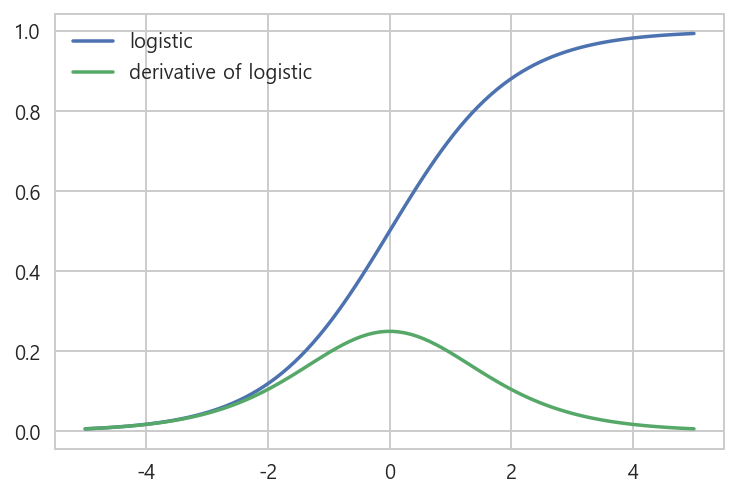

In [53]:
xx = np.linspace(-5, 5, 100)
y1 = np.hstack([logistic(xi) for xi in xx])
y2 = np.hstack([dlogistic(xi) for xi in xx])
plt.plot(xx, y1, label="logistic")
plt.plot(xx, y2, label="derivative of logistic")
plt.legend(loc=0)
plt.show()

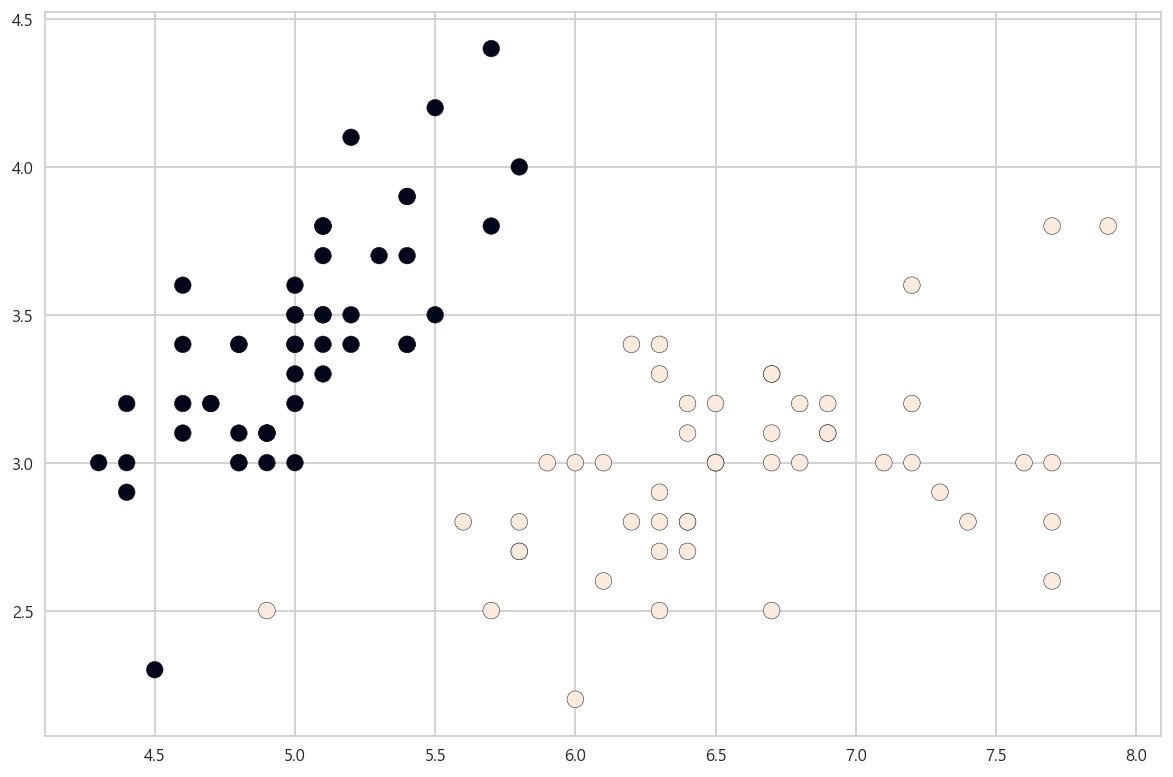

In [54]:
#퍼셉트론구현

from sklearn.datasets import load_iris
iris = load_iris()

idx = np.in1d(iris.target, [0, 2])
X_data = iris.data[idx, 0:2]
y_data = iris.target[idx] - 1  # y=1 또는 y=-1

plt.figure(figsize=(12, 8), dpi=60)
plt.scatter(X_data[:, 0], X_data[:, 1], c=y_data, s=100, edgecolor='k')
plt.show()

In [55]:
X = T.dmatrix('X')
y = T.dvector('y')
np.random.seed(0)
w = theano.shared(0.001 * np.random.randn(2), name="w")
b = theano.shared(0.001 * np.random.randn(1)[0], name="b")
z = T.tanh(T.dot(X, w) + b)
cost = T.sum(T.maximum(0, -y * z))

In [56]:
gw, gb = T.grad(cost, [w, b])
mu = 1e-7
train = theano.function([X, y], cost, updates=[(w, w - mu * gw), (b, b - mu * gb)])

In [57]:
for i in range(100):
    cost_i = train(X_data, y_data)
    if i % 10 == 0:
        print("{:4d}: ".format(i), cost_i)

   0:  0.5588424928848522
  10:  0.4645058718722919
  20:  0.3701625011442721
  30:  0.27581374670328085
  40:  0.18146097498533956
  50:  0.08710555275029427
  60:  0.0017481157550485488
  70:  0.0003194822026270444
  80:  0.00029294220762885446
  90:  0.00029210620994642254


In [58]:
y_pred = T.sgn(z) # -1 ~ 1 => -1 또는 1 
y_pred_func = theano.function([X], y_pred)
y_pred = y_pred_func(X_data)
y_pred

array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1.,  1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.])

In [59]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_data, y_pred)

array([[49,  1],
       [ 1, 49]], dtype=int64)

# 연습문제 1
- 위코드를 아래와 같이 고쳐라

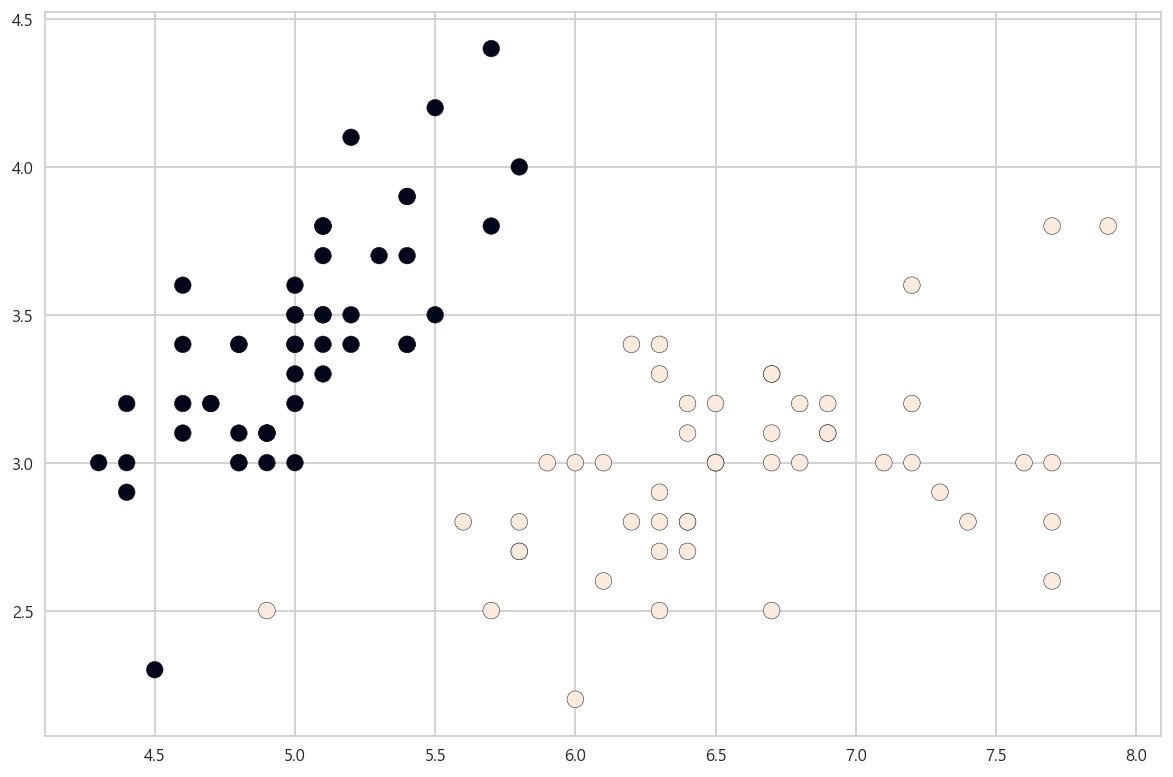

In [66]:
#퍼셉트론구현

from sklearn.datasets import load_iris
iris = load_iris()

idx = np.in1d(iris.target, [0, 2])
X_data = iris.data[idx, 0:2]
y_data = iris.target[idx] / 2  # y=1 또는 y=0

plt.figure(figsize=(12, 8), dpi=60)
plt.scatter(X_data[:, 0], X_data[:, 1], c=y_data, s=100, edgecolor='k')
plt.show()

In [136]:
X = T.dmatrix('X')
y = T.dvector('y')
np.random.seed(0)
w = theano.shared(0.001 * np.random.randn(2), name="w")
b = theano.shared(0.001 * np.random.randn(1)[0], name="b")

z = 1 / (1 + T.exp(-(T.dot(X, w) + b)))

cost = T.sum((y - z)**2)


In [137]:
gw, gb = T.grad(cost, [w, b])
mu = 3e-3
train = theano.function([X, y], cost, updates=[(w, w - mu * gw), (b, b - mu * gb)])

In [138]:
for i in range(1000):
    cost_i = train(X_data, y_data)
    if i % 100 == 0:
        print("{:4d}: ".format(i), cost_i)

   0:  24.9683287358724
 100:  6.2927007228728655
 200:  3.946278197220355
 300:  3.0454748976610317
 400:  2.5619432017221064
 500:  2.2570973957582954
 600:  2.045743897530579
 700:  1.889701392291189
 800:  1.769227643059599
 900:  1.6730521971510077


In [139]:
y_pred = T.round(z) # -1 ~ 1 => -1 또는 1 
y_pred_func = theano.function([X], y_pred)
y_pred = y_pred_func(X_data)
y_pred

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [140]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_data, y_pred)

array([[49,  1],
       [ 0, 50]], dtype=int64)

# Tensorflow

In [142]:
import tensorflow as tf

In [143]:
x = tf.Variable(1.0)
y = tf.Variable(2.0)

In [144]:
type(x), type(y)

(tensorflow.python.ops.variables.Variable,
 tensorflow.python.ops.variables.Variable)

In [145]:
z = x + y

In [146]:
type(z)

tensorflow.python.framework.ops.Tensor

In [147]:
u = tf.log(z)

In [148]:
type(u)

tensorflow.python.framework.ops.Tensor

In [149]:
# 세션
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)
print(sess.run(z)) 
print(sess.run(u)) 
sess.close()

3.0
1.09861


In [150]:
# 미분
f = x ** 2
fx = tf.gradients(f, [x])

with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    print(sess.run(f))    
    print(sess.run(fx))

1.0
[2.0]


## 연습문제
- $ tensorboard --host=0.0.0.0 --logdir=c:/home/dockeruser/logs 로 텐서보드 그래프 확인 가능

In [204]:
from sklearn.datasets import load_iris
iris = load_iris()

idx = np.in1d(iris.target, [0, 2])
X_data = iris.data[idx, 0:2]
y_data = (iris.target[idx] / 2 )[:, np.newaxis] # y=1 또는 y=-1. 2차원임을 명시


In [205]:
np.random.seed(0)
w = tf.Variable(1e-3 * np.random.randn(2, 1))
b = tf.Variable(1e-3 * np.random.randn(1)[0])
d = tf.sigmoid(tf.matmul(X_data, w) + b)

zero = np.zeros(1, dtype=np.float64)[0] # float64 자료형의 0 값 생성 
cost = tf.reduce_sum((y_data - d)**2)
optimizer = tf.train.GradientDescentOptimizer(2e-2)
train = optimizer.minimize(cost)

sess = tf.Session()

w_summary = tf.summary.histogram("w", w)
b_summary = tf.summary.scalar("b", b)
d_summary = tf.summary.histogram("d", d)
cost_summary = tf.summary.scalar("cost", cost)
merged = tf.summary.merge_all() #([w_summary, b_summary, d_summary, cost_summary])

init = tf.global_variables_initializer()
sess.run(init)

writer = tf.summary.FileWriter("c:/home/dockeruser/logs", sess.graph)

for i in range(10001):
    sess.run(train)
    summary = sess.run(merged)
    writer.add_summary(summary, i)
    if i % 1000 == 0:
        print("{:4d}: ".format(i), sess.run(cost))


   0:  33.7712183742
1000:  0.902999224458
2000:  0.713769512371
3000:  0.597542199063
4000:  0.51528855633
5000:  0.456918070683
6000:  0.414897193202
7000:  0.383751979664
8000:  0.359870342328
9000:  0.340949321563
10000:  0.325516197071


In [206]:
y_pred = sess.run(tf.round(d))

In [207]:
sess.close()

In [208]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_data, y_pred)

array([[50,  0],
       [ 0, 50]], dtype=int64)

# Keras로 뉴럴넷 사용하기(Higher level)
- https://datascienceschool.net/view-notebook/51e147088d474fe1bf32e394394eaea7/

In [209]:
%%time
from keras.datasets import mnist
(X_train0, y_train0), (X_test0, y_test0) = mnist.load_data()

Using TensorFlow backend.


Wall time: 602 ms


In [210]:
print(X_train0.shape, X_train0.dtype)
print(y_train0.shape, y_train0.dtype)
print(X_test0.shape, X_test0.dtype)
print(y_test0.shape, y_test0.dtype)

(60000, 28, 28) uint8
(60000,) uint8
(10000, 28, 28) uint8
(10000,) uint8


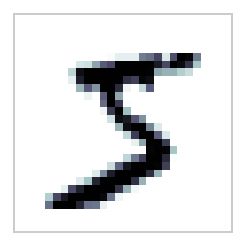

In [211]:
plt.figure(figsize=(2, 2))
plt.imshow(X_train0[0], cmap=mpl.cm.bone_r)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.show()

In [212]:
#데이터를 float타입으로 바구고 스케일링한다.

X_train = X_train0.reshape(60000, 784).astype('float32') / 255.0
X_test = X_test0.reshape(10000, 784).astype('float32') / 255.0
print(X_train.shape, X_train.dtype)

(60000, 784) float32


In [213]:
# y데이터는 OHE한다
y_train0[:5]


array([5, 0, 4, 1, 9], dtype=uint8)

In [214]:
from keras.utils import np_utils

Y_train = np_utils.to_categorical(y_train0, 10)
Y_test = np_utils.to_categorical(y_test0, 10)
Y_train[:5]

array([[ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]], dtype=float32)

# 신경망 구현 순서¶
Keras 를 사용하면 다음과 같은 순서로 신경망을 구성할 수 있다.

1. Sequential 모형 클래스 객체 생성
2. add 메서드로 layer 추가.
    - Dense layer 가 가장 일반적인 신경망
    - 입력단부터 순차적으로 추가한다.
    - 레이어는 출력 뉴런 갯수를 첫번째 인수로 받는다.
    - 최초의 레이어는 input_dim 인수로 입력 크기를 설정해야 한다.
    - activation 인수로 activation 함수 설정
3. compile 메서드로 모형 완성.
    - loss인수로 Loss 함수 설정
    - optimizer 인수로 최적화 알고리즘 설정
    - metrics 인수로 트레이닝 단계에서 기록할 성능 기준 설정
4. fit 메서드로 트레이닝
    - nb_epoch 로 epoch 횟수 설정
    - batch_size 로 mini batch size 설정
    - metrics 인수로 설정한 성능 기준 기록을 출력으로 반환
    - Jupyter Notebook을 사용할 때는 verbose=2로 설정하여 progress bar 가 나오지 않도록 설정한다.

In [215]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD

np.random.seed(0)

model = Sequential()
model.add(Dense(15, input_dim=784, activation="sigmoid")) # 레이어 1
model.add(Dense(10, activation="sigmoid")) # 레이어 2 --> dim 안서줘도 된다. 이전에 이미 했기때문에
model.compile(optimizer=SGD(lr=0.2), loss='mean_squared_error', metrics=["accuracy"])

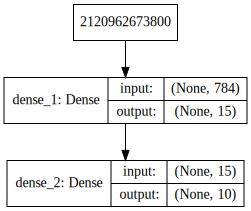

In [216]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [217]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 15)                11775     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                160       
Total params: 11,935
Trainable params: 11,935
Non-trainable params: 0
_________________________________________________________________


In [218]:
l1 = model.layers[0]
l2 = model.layers[1]

In [219]:
l1.name, type(l1), l1.output_shape, l1.activation.__name__, l1.count_params()

('dense_1', keras.layers.core.Dense, (None, 15), 'sigmoid', 11775)

In [220]:
l2.name, type(l1), l2.output_shape, l2.activation.__name__, l2.count_params()

('dense_2', keras.layers.core.Dense, (None, 10), 'sigmoid', 160)

In [222]:
%%time
# fit 메서드로 트레이닝 실시 (hist로 반환하면 그래프로 뿌리기 용이하다.)
hist = model.fit(X_train, Y_train, 
                 epochs=30, batch_size=100, 
                 validation_data=(X_test, Y_test), 
                 verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
 - 2s - loss: 0.1019 - acc: 0.2441 - val_loss: 0.0864 - val_acc: 0.3213
Epoch 2/30
 - 1s - loss: 0.0845 - acc: 0.3921 - val_loss: 0.0821 - val_acc: 0.4409
Epoch 3/30
 - 1s - loss: 0.0796 - acc: 0.4997 - val_loss: 0.0765 - val_acc: 0.5340
Epoch 4/30
 - 1s - loss: 0.0740 - acc: 0.5620 - val_loss: 0.0707 - val_acc: 0.5852
Epoch 5/30
 - 1s - loss: 0.0682 - acc: 0.6149 - val_loss: 0.0649 - val_acc: 0.6522
Epoch 6/30
 - 1s - loss: 0.0625 - acc: 0.6759 - val_loss: 0.0594 - val_acc: 0.6998
Epoch 7/30
 - 1s - loss: 0.0576 - acc: 0.7101 - val_loss: 0.0551 - val_acc: 0.7317
Epoch 8/30
 - 1s - loss: 0.0537 - acc: 0.7325 - val_loss: 0.0516 - val_acc: 0.7485
Epoch 9/30
 - 1s - loss: 0.0505 - acc: 0.7474 - val_loss: 0.0486 - val_acc: 0.7638
Epoch 10/30
 - 1s - loss: 0.0478 - acc: 0.7608 - val_loss: 0.0461 - val_acc: 0.7759
Epoch 11/30
 - 1s - loss: 0.0455 - acc: 0.7739 - val_loss: 0.0439 - val_acc: 0.7893
Epoch 12/30
 - 1s - loss: 0.0435 - 

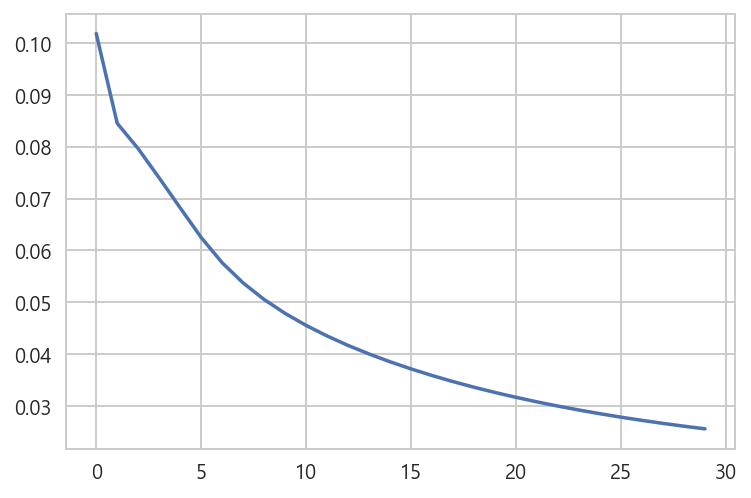

In [223]:
plt.plot(hist.history['loss'])
plt.show()

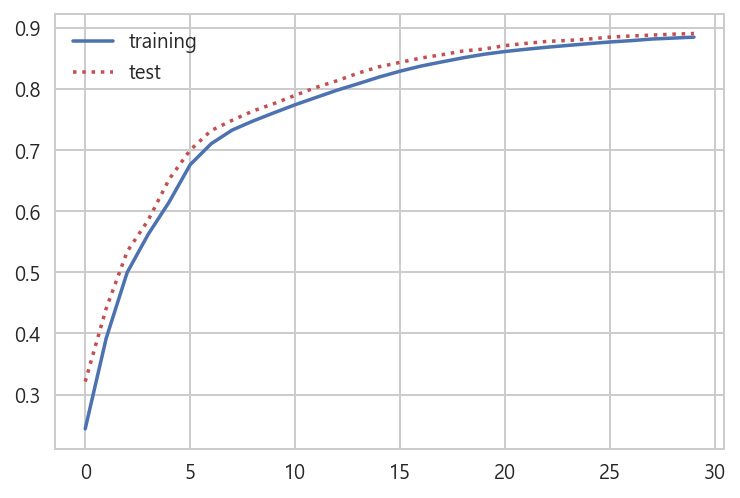

In [224]:
#자료가 좋으면 테스트가 더 높게 나올수도 있다.
plt.plot(hist.history['acc'], 'b-', label="training")
plt.plot(hist.history['val_acc'], 'r:', label="test")
plt.legend()
plt.show()

In [226]:
# 가중치정보 - get_weights로 w값과 b값을 출력

w1 = l1.get_weights()
w1[0].shape, w1[1].shape

((784, 15), (15,))

In [227]:
w2 = l2.get_weights()
w2[0].shape, w2[1].shape

((15, 10), (10,))

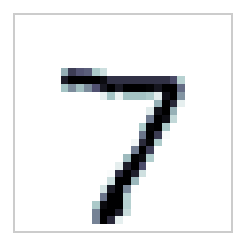

In [228]:
# 모형의 사용
plt.figure(figsize=(2, 2))
plt.imshow(X_test0[0], cmap=mpl.cm.bone_r)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.show()

In [229]:
model.predict(X_test[:1, :])
# 7번 array값이 가장 큰것을 알 수 있다.

array([[ 0.01766611,  0.01916033,  0.01319778,  0.02870286,  0.01252115,
         0.0572134 ,  0.01232443,  0.94186294,  0.0076276 ,  0.05535609]], dtype=float32)

In [230]:
model.predict_classes(X_test[:1, :], verbose=0)

array([7], dtype=int64)

In [232]:
# 모형의 저장
model.save('my_model.hdf5')
del model #저장하고 지움

In [233]:
from keras.models import load_model

model2 = load_model('my_model.hdf5') #저장된 모형을 다시 불러옴
model2.predict_classes(X_test[:1, :], verbose=0)

array([7], dtype=int64)

# 연습문제 1

In [473]:
from sklearn.datasets import load_iris
iris = load_iris()

X_data = iris.data
y_data = (iris.target)[:, np.newaxis] # y=1 또는 y=0. 2차원임을 명시

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=40)


from keras.utils import np_utils

Y_train = np_utils.to_categorical(y_train, 3)
Y_test = np_utils.to_categorical(y_test, 3)
# Y_train

In [474]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD

np.random.seed(0)

model = Sequential()
model.add(Dense(7, input_dim=4, activation="sigmoid")) # 레이어 1
model.add(Dense(3, activation="sigmoid")) # 레이어 2 --> dim 안서줘도 된다. 이전에 이미 했기때문에
model.compile(optimizer=SGD(lr=0.25), loss='mean_squared_error', metrics=["accuracy"])

In [475]:
l1 = model.layers[0]
l2 = model.layers[1]

In [476]:
%%time
# fit 메서드로 트레이닝 실시 (hist로 반환하면 그래프로 뿌리기 용이하다.)
hist = model.fit(X_train, Y_train, 
                 epochs=750, 
                 validation_data=(X_test, Y_test), 
                 verbose=2)

Train on 105 samples, validate on 45 samples
Epoch 1/750
 - 1s - loss: 0.2520 - acc: 0.3333 - val_loss: 0.2443 - val_acc: 0.3333
Epoch 2/750
 - 0s - loss: 0.2405 - acc: 0.3333 - val_loss: 0.2355 - val_acc: 0.3333
Epoch 3/750
 - 0s - loss: 0.2315 - acc: 0.3333 - val_loss: 0.2285 - val_acc: 0.3333
Epoch 4/750
 - 0s - loss: 0.2255 - acc: 0.3333 - val_loss: 0.2231 - val_acc: 0.3333
Epoch 5/750
 - 0s - loss: 0.2213 - acc: 0.3333 - val_loss: 0.2192 - val_acc: 0.3333
Epoch 6/750
 - 0s - loss: 0.2176 - acc: 0.3333 - val_loss: 0.2174 - val_acc: 0.3333
Epoch 7/750
 - 0s - loss: 0.2158 - acc: 0.3333 - val_loss: 0.2147 - val_acc: 0.3556
Epoch 8/750
 - 0s - loss: 0.2136 - acc: 0.3333 - val_loss: 0.2135 - val_acc: 0.5333
Epoch 9/750
 - 0s - loss: 0.2119 - acc: 0.5143 - val_loss: 0.2108 - val_acc: 0.5111
Epoch 10/750
 - 0s - loss: 0.2094 - acc: 0.6000 - val_loss: 0.2090 - val_acc: 0.4222
Epoch 11/750
 - 0s - loss: 0.2080 - acc: 0.6286 - val_loss: 0.2076 - val_acc: 0.4889
Epoch 12/750
 - 0s - loss: 0.

Epoch 97/750
 - 0s - loss: 0.1201 - acc: 0.8762 - val_loss: 0.1151 - val_acc: 0.9556
Epoch 98/750
 - 0s - loss: 0.1200 - acc: 0.9429 - val_loss: 0.1144 - val_acc: 0.9556
Epoch 99/750
 - 0s - loss: 0.1189 - acc: 0.9619 - val_loss: 0.1138 - val_acc: 0.9111
Epoch 100/750
 - 0s - loss: 0.1185 - acc: 0.9333 - val_loss: 0.1136 - val_acc: 0.9556
Epoch 101/750
 - 0s - loss: 0.1182 - acc: 0.9714 - val_loss: 0.1128 - val_acc: 0.8889
Epoch 102/750
 - 0s - loss: 0.1178 - acc: 0.8762 - val_loss: 0.1123 - val_acc: 0.8667
Epoch 103/750
 - 0s - loss: 0.1174 - acc: 0.8571 - val_loss: 0.1119 - val_acc: 0.8889
Epoch 104/750
 - 0s - loss: 0.1173 - acc: 0.8381 - val_loss: 0.1115 - val_acc: 0.8889
Epoch 105/750
 - 0s - loss: 0.1166 - acc: 0.8381 - val_loss: 0.1112 - val_acc: 0.9111
Epoch 106/750
 - 0s - loss: 0.1159 - acc: 0.9048 - val_loss: 0.1111 - val_acc: 0.9556
Epoch 107/750
 - 0s - loss: 0.1164 - acc: 0.9524 - val_loss: 0.1104 - val_acc: 0.9111
Epoch 108/750
 - 0s - loss: 0.1155 - acc: 0.9143 - val_lo

Epoch 193/750
 - 0s - loss: 0.0878 - acc: 0.9524 - val_loss: 0.0851 - val_acc: 0.8667
Epoch 194/750
 - 0s - loss: 0.0884 - acc: 0.9238 - val_loss: 0.0837 - val_acc: 0.9333
Epoch 195/750
 - 0s - loss: 0.0875 - acc: 0.9524 - val_loss: 0.0838 - val_acc: 0.9556
Epoch 196/750
 - 0s - loss: 0.0874 - acc: 0.9714 - val_loss: 0.0833 - val_acc: 0.9556
Epoch 197/750
 - 0s - loss: 0.0872 - acc: 0.9714 - val_loss: 0.0829 - val_acc: 0.9556
Epoch 198/750
 - 0s - loss: 0.0859 - acc: 0.9810 - val_loss: 0.0828 - val_acc: 0.9333
Epoch 199/750
 - 0s - loss: 0.0859 - acc: 0.9619 - val_loss: 0.0825 - val_acc: 0.9333
Epoch 200/750
 - 0s - loss: 0.0859 - acc: 0.9714 - val_loss: 0.0822 - val_acc: 0.9333
Epoch 201/750
 - 0s - loss: 0.0853 - acc: 0.9714 - val_loss: 0.0819 - val_acc: 0.9556
Epoch 202/750
 - 0s - loss: 0.0852 - acc: 0.9714 - val_loss: 0.0819 - val_acc: 0.9556
Epoch 203/750
 - 0s - loss: 0.0845 - acc: 0.9810 - val_loss: 0.0819 - val_acc: 0.9333
Epoch 204/750
 - 0s - loss: 0.0844 - acc: 0.9619 - val

Epoch 289/750
 - 0s - loss: 0.0649 - acc: 0.9810 - val_loss: 0.0631 - val_acc: 0.9556
Epoch 290/750
 - 0s - loss: 0.0636 - acc: 0.9714 - val_loss: 0.0623 - val_acc: 0.9778
Epoch 291/750
 - 0s - loss: 0.0633 - acc: 0.9619 - val_loss: 0.0683 - val_acc: 0.8889
Epoch 292/750
 - 0s - loss: 0.0651 - acc: 0.9524 - val_loss: 0.0619 - val_acc: 0.9556
Epoch 293/750
 - 0s - loss: 0.0631 - acc: 0.9714 - val_loss: 0.0617 - val_acc: 0.9778
Epoch 294/750
 - 0s - loss: 0.0638 - acc: 0.9619 - val_loss: 0.0621 - val_acc: 0.9556
Epoch 295/750
 - 0s - loss: 0.0627 - acc: 0.9714 - val_loss: 0.0634 - val_acc: 0.9333
Epoch 296/750
 - 0s - loss: 0.0640 - acc: 0.9524 - val_loss: 0.0609 - val_acc: 0.9778
Epoch 297/750
 - 0s - loss: 0.0616 - acc: 0.9810 - val_loss: 0.0608 - val_acc: 0.9556
Epoch 298/750
 - 0s - loss: 0.0615 - acc: 0.9810 - val_loss: 0.0606 - val_acc: 0.9778
Epoch 299/750
 - 0s - loss: 0.0615 - acc: 0.9810 - val_loss: 0.0621 - val_acc: 0.9333
Epoch 300/750
 - 0s - loss: 0.0614 - acc: 0.9714 - val

Epoch 385/750
 - 0s - loss: 0.0468 - acc: 0.9714 - val_loss: 0.0471 - val_acc: 0.9778
Epoch 386/750
 - 0s - loss: 0.0477 - acc: 0.9810 - val_loss: 0.0471 - val_acc: 0.9778
Epoch 387/750
 - 0s - loss: 0.0467 - acc: 0.9714 - val_loss: 0.0488 - val_acc: 0.9556
Epoch 388/750
 - 0s - loss: 0.0465 - acc: 0.9714 - val_loss: 0.0467 - val_acc: 0.9778
Epoch 389/750
 - 0s - loss: 0.0465 - acc: 0.9714 - val_loss: 0.0474 - val_acc: 0.9778
Epoch 390/750
 - 0s - loss: 0.0486 - acc: 0.9714 - val_loss: 0.0493 - val_acc: 0.9333
Epoch 391/750
 - 0s - loss: 0.0497 - acc: 0.9429 - val_loss: 0.0464 - val_acc: 0.9778
Epoch 392/750
 - 0s - loss: 0.0466 - acc: 0.9714 - val_loss: 0.0462 - val_acc: 0.9778
Epoch 393/750
 - 0s - loss: 0.0464 - acc: 0.9714 - val_loss: 0.0479 - val_acc: 0.9556
Epoch 394/750
 - 0s - loss: 0.0457 - acc: 0.9714 - val_loss: 0.0460 - val_acc: 0.9778
Epoch 395/750
 - 0s - loss: 0.0456 - acc: 0.9714 - val_loss: 0.0463 - val_acc: 0.9778
Epoch 396/750
 - 0s - loss: 0.0454 - acc: 0.9714 - val

Epoch 481/750
 - 0s - loss: 0.0374 - acc: 0.9714 - val_loss: 0.0382 - val_acc: 0.9778
Epoch 482/750
 - 0s - loss: 0.0370 - acc: 0.9714 - val_loss: 0.0406 - val_acc: 0.9556
Epoch 483/750
 - 0s - loss: 0.0375 - acc: 0.9714 - val_loss: 0.0396 - val_acc: 0.9556
Epoch 484/750
 - 0s - loss: 0.0370 - acc: 0.9714 - val_loss: 0.0376 - val_acc: 0.9778
Epoch 485/750
 - 0s - loss: 0.0364 - acc: 0.9714 - val_loss: 0.0387 - val_acc: 0.9556
Epoch 486/750
 - 0s - loss: 0.0363 - acc: 0.9714 - val_loss: 0.0376 - val_acc: 0.9778
Epoch 487/750
 - 0s - loss: 0.0376 - acc: 0.9714 - val_loss: 0.0406 - val_acc: 0.9556
Epoch 488/750
 - 0s - loss: 0.0370 - acc: 0.9714 - val_loss: 0.0374 - val_acc: 0.9778
Epoch 489/750
 - 0s - loss: 0.0361 - acc: 0.9714 - val_loss: 0.0369 - val_acc: 0.9778
Epoch 490/750
 - 0s - loss: 0.0363 - acc: 0.9714 - val_loss: 0.0369 - val_acc: 0.9778
Epoch 491/750
 - 0s - loss: 0.0362 - acc: 0.9714 - val_loss: 0.0389 - val_acc: 0.9556
Epoch 492/750
 - 0s - loss: 0.0362 - acc: 0.9714 - val

Epoch 577/750
 - 0s - loss: 0.0304 - acc: 0.9810 - val_loss: 0.0318 - val_acc: 0.9778
Epoch 578/750
 - 0s - loss: 0.0305 - acc: 0.9714 - val_loss: 0.0318 - val_acc: 0.9778
Epoch 579/750
 - 0s - loss: 0.0307 - acc: 0.9714 - val_loss: 0.0314 - val_acc: 1.0000
Epoch 580/750
 - 0s - loss: 0.0321 - acc: 0.9714 - val_loss: 0.0310 - val_acc: 0.9778
Epoch 581/750
 - 0s - loss: 0.0317 - acc: 0.9714 - val_loss: 0.0314 - val_acc: 0.9778
Epoch 582/750
 - 0s - loss: 0.0303 - acc: 0.9714 - val_loss: 0.0328 - val_acc: 0.9778
Epoch 583/750
 - 0s - loss: 0.0327 - acc: 0.9714 - val_loss: 0.0314 - val_acc: 0.9778
Epoch 584/750
 - 0s - loss: 0.0339 - acc: 0.9714 - val_loss: 0.0309 - val_acc: 0.9778
Epoch 585/750
 - 0s - loss: 0.0302 - acc: 0.9810 - val_loss: 0.0307 - val_acc: 0.9778
Epoch 586/750
 - 0s - loss: 0.0315 - acc: 0.9619 - val_loss: 0.0307 - val_acc: 0.9778
Epoch 587/750
 - 0s - loss: 0.0304 - acc: 0.9810 - val_loss: 0.0321 - val_acc: 0.9778
Epoch 588/750
 - 0s - loss: 0.0306 - acc: 0.9714 - val

Epoch 673/750
 - 0s - loss: 0.0266 - acc: 0.9714 - val_loss: 0.0271 - val_acc: 0.9778
Epoch 674/750
 - 0s - loss: 0.0269 - acc: 0.9714 - val_loss: 0.0271 - val_acc: 1.0000
Epoch 675/750
 - 0s - loss: 0.0275 - acc: 0.9810 - val_loss: 0.0279 - val_acc: 0.9778
Epoch 676/750
 - 0s - loss: 0.0283 - acc: 0.9524 - val_loss: 0.0276 - val_acc: 0.9778
Epoch 677/750
 - 0s - loss: 0.0281 - acc: 0.9619 - val_loss: 0.0269 - val_acc: 0.9778
Epoch 678/750
 - 0s - loss: 0.0267 - acc: 0.9714 - val_loss: 0.0280 - val_acc: 0.9778
Epoch 679/750
 - 0s - loss: 0.0263 - acc: 0.9714 - val_loss: 0.0270 - val_acc: 0.9778
Epoch 680/750
 - 0s - loss: 0.0263 - acc: 0.9714 - val_loss: 0.0279 - val_acc: 0.9778
Epoch 681/750
 - 0s - loss: 0.0276 - acc: 0.9714 - val_loss: 0.0266 - val_acc: 0.9778
Epoch 682/750
 - 0s - loss: 0.0266 - acc: 0.9714 - val_loss: 0.0266 - val_acc: 0.9778
Epoch 683/750
 - 0s - loss: 0.0269 - acc: 0.9810 - val_loss: 0.0268 - val_acc: 0.9778
Epoch 684/750
 - 0s - loss: 0.0273 - acc: 0.9714 - val

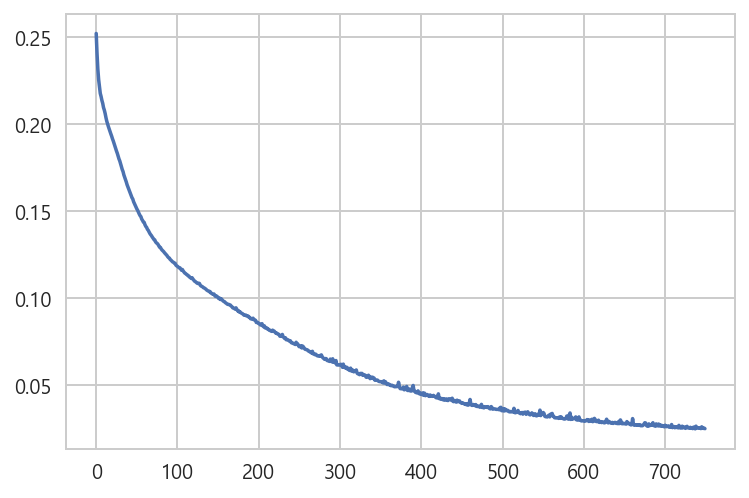

In [477]:
plt.plot(hist.history['loss'])
plt.show()

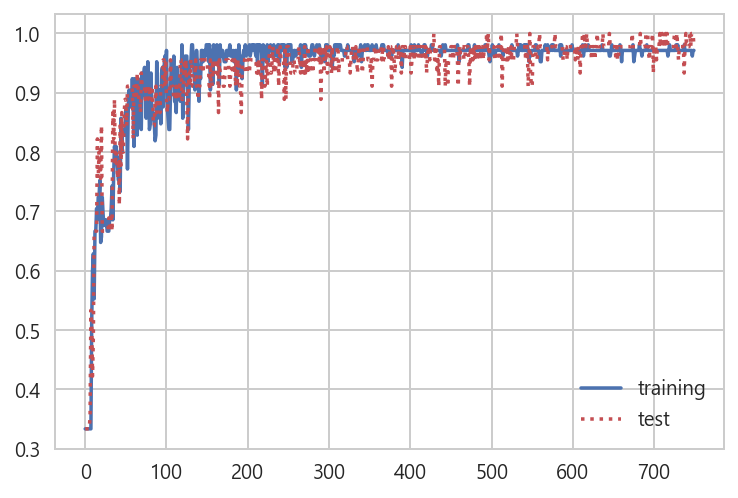

In [478]:
#자료가 좋으면 테스트가 더 높게 나올수도 있다.
plt.plot(hist.history['acc'], 'b-', label="training")
plt.plot(hist.history['val_acc'], 'r:', label="test")
plt.legend()
plt.show()

In [472]:
from sklearn.metrics import *
y_pred = model.predict_classes(Y_train,verbose=0)

print("- Accuracy_Score : ", accuracy_score(Y_test, y_pred))
print("- Confusion_Matrix \n",confusion_matrix(Y_test, y_pred))
# print(classification_report(Y_test, model.predict(Y_train)))

ValueError: Error when checking input: expected dense_63_input to have shape (4,) but got array with shape (3,)

# 연습문제 2

In [498]:
from sklearn.datasets import fetch_olivetti_faces
olivetti = fetch_olivetti_faces()
print(olivetti.DESCR)
print(olivetti.keys())
olivetti.data

Modified Olivetti faces dataset.

The original database was available from

    http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

The version retrieved here comes in MATLAB format from the personal
web page of Sam Roweis:

    http://www.cs.nyu.edu/~roweis/

There are ten different images of each of 40 distinct subjects. For some
subjects, the images were taken at different times, varying the lighting,
facial expressions (open / closed eyes, smiling / not smiling) and facial
details (glasses / no glasses). All the images were taken against a dark
homogeneous background with the subjects in an upright, frontal position (with
tolerance for some side movement).

The original dataset consisted of 92 x 112, while the Roweis version
consists of 64x64 images.

dict_keys(['data', 'images', 'target', 'DESCR'])


array([[ 0.30991736,  0.36776859,  0.41735536, ...,  0.15289256,
         0.16115703,  0.1570248 ],
       [ 0.45454547,  0.47107437,  0.51239669, ...,  0.15289256,
         0.15289256,  0.15289256],
       [ 0.31818181,  0.40082645,  0.49173555, ...,  0.14049587,
         0.14876033,  0.15289256],
       ..., 
       [ 0.5       ,  0.53305787,  0.60743803, ...,  0.17768595,
         0.14876033,  0.19008264],
       [ 0.21487603,  0.21900827,  0.21900827, ...,  0.57438016,
         0.59090906,  0.60330576],
       [ 0.5165289 ,  0.46280992,  0.28099173, ...,  0.35950413,
         0.35537189,  0.38429752]], dtype=float32)

In [548]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(olivetti.data, olivetti.target, test_size=0.4, random_state=0)

In [549]:
print(X_train.shape, X_train.dtype)
print(y_train.shape, y_train.dtype)
print(X_test.shape, X_test.dtype)
print(y_test.shape, y_test.dtype)

from keras.utils import np_utils

Y_train = np_utils.to_categorical(y_train, 40)
Y_test = np_utils.to_categorical(y_test, 40)


(240, 4096) float32
(240,) int32
(160, 4096) float32
(160,) int32


In [566]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD

np.random.seed(0)

model = Sequential()
model.add(Dense(180, input_dim=4096, activation="sigmoid")) # 레이어 1
# model.add(Dense(80, activation="sigmoid")) # 레이어 3
model.add(Dense(40, activation="sigmoid")) # 레이어 3
model.compile(optimizer=SGD(lr=3.5), loss='mean_squared_error', metrics=["accuracy"])

In [567]:
l1 = model.layers[0]
l2 = model.layers[1]
# l3 = model.layers[2]

In [568]:
%%time
# fit 메서드로 트레이닝 실시 (hist로 반환하면 그래프로 뿌리기 용이하다.)
hist = model.fit(X_train, Y_train, 
                 epochs=3500, 
                 validation_data=(X_test, Y_test), 
                 verbose=2)

Train on 240 samples, validate on 160 samples
Epoch 1/3500
 - 1s - loss: 0.0622 - acc: 0.0292 - val_loss: 0.0261 - val_acc: 0.0437
Epoch 2/3500
 - 0s - loss: 0.0255 - acc: 0.0500 - val_loss: 0.0251 - val_acc: 0.0437
Epoch 3/3500
 - 0s - loss: 0.0248 - acc: 0.0542 - val_loss: 0.0248 - val_acc: 0.0437
Epoch 4/3500
 - 0s - loss: 0.0246 - acc: 0.0625 - val_loss: 0.0246 - val_acc: 0.0500
Epoch 5/3500
 - 0s - loss: 0.0245 - acc: 0.0542 - val_loss: 0.0246 - val_acc: 0.0375
Epoch 6/3500
 - 0s - loss: 0.0244 - acc: 0.0500 - val_loss: 0.0245 - val_acc: 0.0250
Epoch 7/3500
 - 0s - loss: 0.0244 - acc: 0.0375 - val_loss: 0.0245 - val_acc: 0.0312
Epoch 8/3500
 - 0s - loss: 0.0244 - acc: 0.0542 - val_loss: 0.0245 - val_acc: 0.0375
Epoch 9/3500
 - 0s - loss: 0.0244 - acc: 0.0417 - val_loss: 0.0245 - val_acc: 0.0250
Epoch 10/3500
 - 0s - loss: 0.0244 - acc: 0.0500 - val_loss: 0.0245 - val_acc: 0.0250
Epoch 11/3500
 - 0s - loss: 0.0243 - acc: 0.0625 - val_loss: 0.0245 - val_acc: 0.0375
Epoch 12/3500
 - 

Epoch 96/3500
 - 0s - loss: 0.0241 - acc: 0.1083 - val_loss: 0.0245 - val_acc: 0.0312
Epoch 97/3500
 - 0s - loss: 0.0241 - acc: 0.1083 - val_loss: 0.0245 - val_acc: 0.0312
Epoch 98/3500
 - 0s - loss: 0.0241 - acc: 0.1042 - val_loss: 0.0245 - val_acc: 0.0312
Epoch 99/3500
 - 0s - loss: 0.0241 - acc: 0.0792 - val_loss: 0.0245 - val_acc: 0.0312
Epoch 100/3500
 - 0s - loss: 0.0241 - acc: 0.0625 - val_loss: 0.0245 - val_acc: 0.0312
Epoch 101/3500
 - 0s - loss: 0.0241 - acc: 0.1292 - val_loss: 0.0245 - val_acc: 0.0437
Epoch 102/3500
 - 0s - loss: 0.0241 - acc: 0.1000 - val_loss: 0.0245 - val_acc: 0.0312
Epoch 103/3500
 - 0s - loss: 0.0241 - acc: 0.0792 - val_loss: 0.0245 - val_acc: 0.0563
Epoch 104/3500
 - 0s - loss: 0.0241 - acc: 0.1208 - val_loss: 0.0245 - val_acc: 0.0500
Epoch 105/3500
 - 0s - loss: 0.0241 - acc: 0.1042 - val_loss: 0.0245 - val_acc: 0.0500
Epoch 106/3500
 - 0s - loss: 0.0241 - acc: 0.1167 - val_loss: 0.0245 - val_acc: 0.0375
Epoch 107/3500
 - 0s - loss: 0.0241 - acc: 0.07

Epoch 191/3500
 - 0s - loss: 0.0231 - acc: 0.2500 - val_loss: 0.0242 - val_acc: 0.1187
Epoch 192/3500
 - 0s - loss: 0.0230 - acc: 0.2958 - val_loss: 0.0242 - val_acc: 0.1125
Epoch 193/3500
 - 0s - loss: 0.0230 - acc: 0.3083 - val_loss: 0.0243 - val_acc: 0.0875
Epoch 194/3500
 - 0s - loss: 0.0230 - acc: 0.2708 - val_loss: 0.0242 - val_acc: 0.1125
Epoch 195/3500
 - 0s - loss: 0.0229 - acc: 0.2833 - val_loss: 0.0242 - val_acc: 0.0875
Epoch 196/3500
 - 0s - loss: 0.0229 - acc: 0.2958 - val_loss: 0.0242 - val_acc: 0.1250
Epoch 197/3500
 - 0s - loss: 0.0229 - acc: 0.2667 - val_loss: 0.0242 - val_acc: 0.1250
Epoch 198/3500
 - 0s - loss: 0.0229 - acc: 0.2875 - val_loss: 0.0241 - val_acc: 0.1313
Epoch 199/3500
 - 0s - loss: 0.0229 - acc: 0.2833 - val_loss: 0.0243 - val_acc: 0.1000
Epoch 200/3500
 - 0s - loss: 0.0228 - acc: 0.2583 - val_loss: 0.0242 - val_acc: 0.1000
Epoch 201/3500
 - 0s - loss: 0.0228 - acc: 0.2917 - val_loss: 0.0242 - val_acc: 0.1187
Epoch 202/3500
 - 0s - loss: 0.0228 - acc: 

 - 0s - loss: 0.0192 - acc: 0.4125 - val_loss: 0.0227 - val_acc: 0.1938
Epoch 286/3500
 - 0s - loss: 0.0192 - acc: 0.3792 - val_loss: 0.0225 - val_acc: 0.1938
Epoch 287/3500
 - 0s - loss: 0.0191 - acc: 0.3833 - val_loss: 0.0227 - val_acc: 0.1750
Epoch 288/3500
 - 0s - loss: 0.0191 - acc: 0.3958 - val_loss: 0.0225 - val_acc: 0.2000
Epoch 289/3500
 - 0s - loss: 0.0190 - acc: 0.4125 - val_loss: 0.0226 - val_acc: 0.1938
Epoch 290/3500
 - 0s - loss: 0.0190 - acc: 0.4042 - val_loss: 0.0227 - val_acc: 0.1812
Epoch 291/3500
 - 0s - loss: 0.0189 - acc: 0.4292 - val_loss: 0.0225 - val_acc: 0.2125
Epoch 292/3500
 - 0s - loss: 0.0189 - acc: 0.4042 - val_loss: 0.0226 - val_acc: 0.2062
Epoch 293/3500
 - 0s - loss: 0.0189 - acc: 0.4417 - val_loss: 0.0225 - val_acc: 0.2062
Epoch 294/3500
 - 0s - loss: 0.0188 - acc: 0.4333 - val_loss: 0.0224 - val_acc: 0.2125
Epoch 295/3500
 - 0s - loss: 0.0188 - acc: 0.4292 - val_loss: 0.0223 - val_acc: 0.2437
Epoch 296/3500
 - 0s - loss: 0.0187 - acc: 0.4458 - val_lo

Epoch 380/3500
 - 0s - loss: 0.0152 - acc: 0.6583 - val_loss: 0.0202 - val_acc: 0.3500
Epoch 381/3500
 - 0s - loss: 0.0151 - acc: 0.6417 - val_loss: 0.0201 - val_acc: 0.3438
Epoch 382/3500
 - 0s - loss: 0.0152 - acc: 0.6375 - val_loss: 0.0201 - val_acc: 0.3625
Epoch 383/3500
 - 0s - loss: 0.0150 - acc: 0.6667 - val_loss: 0.0201 - val_acc: 0.3250
Epoch 384/3500
 - 0s - loss: 0.0150 - acc: 0.6417 - val_loss: 0.0201 - val_acc: 0.3625
Epoch 385/3500
 - 0s - loss: 0.0150 - acc: 0.6500 - val_loss: 0.0200 - val_acc: 0.3563
Epoch 386/3500
 - 0s - loss: 0.0149 - acc: 0.6500 - val_loss: 0.0201 - val_acc: 0.3563
Epoch 387/3500
 - 0s - loss: 0.0150 - acc: 0.6625 - val_loss: 0.0201 - val_acc: 0.3563
Epoch 388/3500
 - 0s - loss: 0.0148 - acc: 0.6458 - val_loss: 0.0199 - val_acc: 0.3563
Epoch 389/3500
 - 0s - loss: 0.0148 - acc: 0.6708 - val_loss: 0.0199 - val_acc: 0.3563
Epoch 390/3500
 - 0s - loss: 0.0148 - acc: 0.6583 - val_loss: 0.0199 - val_acc: 0.3500
Epoch 391/3500
 - 0s - loss: 0.0147 - acc: 

 - 0s - loss: 0.0110 - acc: 0.8000 - val_loss: 0.0170 - val_acc: 0.5375
Epoch 475/3500
 - 0s - loss: 0.0110 - acc: 0.8042 - val_loss: 0.0170 - val_acc: 0.5375
Epoch 476/3500
 - 0s - loss: 0.0109 - acc: 0.7958 - val_loss: 0.0171 - val_acc: 0.5250
Epoch 477/3500
 - 0s - loss: 0.0109 - acc: 0.7917 - val_loss: 0.0168 - val_acc: 0.5250
Epoch 478/3500
 - 0s - loss: 0.0108 - acc: 0.7917 - val_loss: 0.0170 - val_acc: 0.5062
Epoch 479/3500
 - 0s - loss: 0.0108 - acc: 0.8042 - val_loss: 0.0170 - val_acc: 0.5563
Epoch 480/3500
 - 0s - loss: 0.0107 - acc: 0.8083 - val_loss: 0.0167 - val_acc: 0.5250
Epoch 481/3500
 - 0s - loss: 0.0107 - acc: 0.8125 - val_loss: 0.0168 - val_acc: 0.5437
Epoch 482/3500
 - 0s - loss: 0.0106 - acc: 0.8042 - val_loss: 0.0168 - val_acc: 0.5500
Epoch 483/3500
 - 0s - loss: 0.0107 - acc: 0.8125 - val_loss: 0.0165 - val_acc: 0.5687
Epoch 484/3500
 - 0s - loss: 0.0106 - acc: 0.8042 - val_loss: 0.0167 - val_acc: 0.5437
Epoch 485/3500
 - 0s - loss: 0.0105 - acc: 0.8125 - val_lo

Epoch 569/3500
 - 0s - loss: 0.0076 - acc: 0.8875 - val_loss: 0.0139 - val_acc: 0.6813
Epoch 570/3500
 - 0s - loss: 0.0075 - acc: 0.8917 - val_loss: 0.0141 - val_acc: 0.6250
Epoch 571/3500
 - 0s - loss: 0.0075 - acc: 0.8792 - val_loss: 0.0138 - val_acc: 0.7000
Epoch 572/3500
 - 0s - loss: 0.0075 - acc: 0.8833 - val_loss: 0.0141 - val_acc: 0.6438
Epoch 573/3500
 - 0s - loss: 0.0074 - acc: 0.8875 - val_loss: 0.0138 - val_acc: 0.6687
Epoch 574/3500
 - 0s - loss: 0.0074 - acc: 0.8958 - val_loss: 0.0140 - val_acc: 0.6562
Epoch 575/3500
 - 0s - loss: 0.0074 - acc: 0.8917 - val_loss: 0.0138 - val_acc: 0.6937
Epoch 576/3500
 - 0s - loss: 0.0073 - acc: 0.9042 - val_loss: 0.0142 - val_acc: 0.6500
Epoch 577/3500
 - 0s - loss: 0.0073 - acc: 0.8958 - val_loss: 0.0138 - val_acc: 0.6813
Epoch 578/3500
 - 0s - loss: 0.0073 - acc: 0.9042 - val_loss: 0.0136 - val_acc: 0.7000
Epoch 579/3500
 - 0s - loss: 0.0072 - acc: 0.9208 - val_loss: 0.0136 - val_acc: 0.6813
Epoch 580/3500
 - 0s - loss: 0.0072 - acc: 

 - 0s - loss: 0.0052 - acc: 0.9458 - val_loss: 0.0113 - val_acc: 0.7812
Epoch 664/3500
 - 0s - loss: 0.0051 - acc: 0.9458 - val_loss: 0.0114 - val_acc: 0.7562
Epoch 665/3500
 - 0s - loss: 0.0051 - acc: 0.9458 - val_loss: 0.0114 - val_acc: 0.7688
Epoch 666/3500
 - 0s - loss: 0.0051 - acc: 0.9458 - val_loss: 0.0113 - val_acc: 0.7625
Epoch 667/3500
 - 0s - loss: 0.0051 - acc: 0.9500 - val_loss: 0.0115 - val_acc: 0.7500
Epoch 668/3500
 - 0s - loss: 0.0051 - acc: 0.9458 - val_loss: 0.0113 - val_acc: 0.7688
Epoch 669/3500
 - 0s - loss: 0.0050 - acc: 0.9458 - val_loss: 0.0116 - val_acc: 0.7438
Epoch 670/3500
 - 0s - loss: 0.0050 - acc: 0.9458 - val_loss: 0.0113 - val_acc: 0.7937
Epoch 671/3500
 - 0s - loss: 0.0050 - acc: 0.9542 - val_loss: 0.0113 - val_acc: 0.7688
Epoch 672/3500
 - 0s - loss: 0.0049 - acc: 0.9458 - val_loss: 0.0113 - val_acc: 0.7688
Epoch 673/3500
 - 0s - loss: 0.0050 - acc: 0.9500 - val_loss: 0.0111 - val_acc: 0.7875
Epoch 674/3500
 - 0s - loss: 0.0049 - acc: 0.9500 - val_lo

Epoch 758/3500
 - 0s - loss: 0.0035 - acc: 0.9792 - val_loss: 0.0094 - val_acc: 0.8375
Epoch 759/3500
 - 0s - loss: 0.0035 - acc: 0.9792 - val_loss: 0.0093 - val_acc: 0.8250
Epoch 760/3500
 - 0s - loss: 0.0034 - acc: 0.9750 - val_loss: 0.0094 - val_acc: 0.8375
Epoch 761/3500
 - 0s - loss: 0.0034 - acc: 0.9792 - val_loss: 0.0093 - val_acc: 0.8438
Epoch 762/3500
 - 0s - loss: 0.0034 - acc: 0.9833 - val_loss: 0.0093 - val_acc: 0.8187
Epoch 763/3500
 - 0s - loss: 0.0034 - acc: 0.9792 - val_loss: 0.0092 - val_acc: 0.8250
Epoch 764/3500
 - 0s - loss: 0.0034 - acc: 0.9792 - val_loss: 0.0093 - val_acc: 0.8125
Epoch 765/3500
 - 0s - loss: 0.0034 - acc: 0.9792 - val_loss: 0.0093 - val_acc: 0.8187
Epoch 766/3500
 - 0s - loss: 0.0034 - acc: 0.9792 - val_loss: 0.0092 - val_acc: 0.8313
Epoch 767/3500
 - 0s - loss: 0.0034 - acc: 0.9792 - val_loss: 0.0092 - val_acc: 0.8438
Epoch 768/3500
 - 0s - loss: 0.0034 - acc: 0.9792 - val_loss: 0.0092 - val_acc: 0.8313
Epoch 769/3500
 - 0s - loss: 0.0033 - acc: 

 - 0s - loss: 0.0024 - acc: 0.9833 - val_loss: 0.0080 - val_acc: 0.8750
Epoch 853/3500
 - 0s - loss: 0.0024 - acc: 0.9875 - val_loss: 0.0081 - val_acc: 0.8688
Epoch 854/3500
 - 0s - loss: 0.0024 - acc: 0.9833 - val_loss: 0.0080 - val_acc: 0.8750
Epoch 855/3500
 - 0s - loss: 0.0024 - acc: 0.9833 - val_loss: 0.0080 - val_acc: 0.8625
Epoch 856/3500
 - 0s - loss: 0.0024 - acc: 0.9833 - val_loss: 0.0080 - val_acc: 0.8625
Epoch 857/3500
 - 0s - loss: 0.0024 - acc: 0.9833 - val_loss: 0.0080 - val_acc: 0.8750
Epoch 858/3500
 - 0s - loss: 0.0023 - acc: 0.9875 - val_loss: 0.0079 - val_acc: 0.8750
Epoch 859/3500
 - 0s - loss: 0.0023 - acc: 0.9833 - val_loss: 0.0079 - val_acc: 0.8750
Epoch 860/3500
 - 0s - loss: 0.0023 - acc: 0.9875 - val_loss: 0.0080 - val_acc: 0.8750
Epoch 861/3500
 - 0s - loss: 0.0023 - acc: 0.9875 - val_loss: 0.0080 - val_acc: 0.8688
Epoch 862/3500
 - 0s - loss: 0.0023 - acc: 0.9833 - val_loss: 0.0079 - val_acc: 0.8750
Epoch 863/3500
 - 0s - loss: 0.0023 - acc: 0.9875 - val_lo

Epoch 947/3500
 - 0s - loss: 0.0017 - acc: 1.0000 - val_loss: 0.0071 - val_acc: 0.8875
Epoch 948/3500
 - 0s - loss: 0.0017 - acc: 1.0000 - val_loss: 0.0070 - val_acc: 0.8875
Epoch 949/3500
 - 0s - loss: 0.0017 - acc: 1.0000 - val_loss: 0.0070 - val_acc: 0.8875
Epoch 950/3500
 - 0s - loss: 0.0017 - acc: 1.0000 - val_loss: 0.0070 - val_acc: 0.8812
Epoch 951/3500
 - 0s - loss: 0.0016 - acc: 1.0000 - val_loss: 0.0070 - val_acc: 0.8875
Epoch 952/3500
 - 0s - loss: 0.0017 - acc: 1.0000 - val_loss: 0.0069 - val_acc: 0.8875
Epoch 953/3500
 - 0s - loss: 0.0016 - acc: 1.0000 - val_loss: 0.0070 - val_acc: 0.8750
Epoch 954/3500
 - 0s - loss: 0.0016 - acc: 1.0000 - val_loss: 0.0070 - val_acc: 0.8875
Epoch 955/3500
 - 0s - loss: 0.0016 - acc: 1.0000 - val_loss: 0.0069 - val_acc: 0.8938
Epoch 956/3500
 - 0s - loss: 0.0016 - acc: 1.0000 - val_loss: 0.0070 - val_acc: 0.8875
Epoch 957/3500
 - 0s - loss: 0.0016 - acc: 1.0000 - val_loss: 0.0070 - val_acc: 0.8938
Epoch 958/3500
 - 0s - loss: 0.0016 - acc: 

Epoch 1041/3500
 - 0s - loss: 0.0012 - acc: 1.0000 - val_loss: 0.0064 - val_acc: 0.8875
Epoch 1042/3500
 - 0s - loss: 0.0012 - acc: 1.0000 - val_loss: 0.0063 - val_acc: 0.9125
Epoch 1043/3500
 - 0s - loss: 0.0012 - acc: 1.0000 - val_loss: 0.0063 - val_acc: 0.9062
Epoch 1044/3500
 - 0s - loss: 0.0012 - acc: 1.0000 - val_loss: 0.0064 - val_acc: 0.8875
Epoch 1045/3500
 - 0s - loss: 0.0012 - acc: 1.0000 - val_loss: 0.0064 - val_acc: 0.8938
Epoch 1046/3500
 - 0s - loss: 0.0012 - acc: 1.0000 - val_loss: 0.0063 - val_acc: 0.8938
Epoch 1047/3500
 - 0s - loss: 0.0012 - acc: 1.0000 - val_loss: 0.0063 - val_acc: 0.9000
Epoch 1048/3500
 - 0s - loss: 0.0012 - acc: 1.0000 - val_loss: 0.0063 - val_acc: 0.9000
Epoch 1049/3500
 - 0s - loss: 0.0012 - acc: 1.0000 - val_loss: 0.0063 - val_acc: 0.9000
Epoch 1050/3500
 - 0s - loss: 0.0012 - acc: 1.0000 - val_loss: 0.0064 - val_acc: 0.8875
Epoch 1051/3500
 - 0s - loss: 0.0012 - acc: 1.0000 - val_loss: 0.0063 - val_acc: 0.8938
Epoch 1052/3500
 - 0s - loss: 0.

Epoch 1133/3500
 - 0s - loss: 8.9396e-04 - acc: 1.0000 - val_loss: 0.0059 - val_acc: 0.9187
Epoch 1134/3500
 - 0s - loss: 8.8790e-04 - acc: 1.0000 - val_loss: 0.0060 - val_acc: 0.9187
Epoch 1135/3500
 - 0s - loss: 8.8486e-04 - acc: 1.0000 - val_loss: 0.0059 - val_acc: 0.9125
Epoch 1136/3500
 - 0s - loss: 8.8765e-04 - acc: 1.0000 - val_loss: 0.0059 - val_acc: 0.9187
Epoch 1137/3500
 - 0s - loss: 8.8885e-04 - acc: 1.0000 - val_loss: 0.0059 - val_acc: 0.9125
Epoch 1138/3500
 - 0s - loss: 8.7427e-04 - acc: 1.0000 - val_loss: 0.0060 - val_acc: 0.9062
Epoch 1139/3500
 - 0s - loss: 8.7485e-04 - acc: 1.0000 - val_loss: 0.0059 - val_acc: 0.9062
Epoch 1140/3500
 - 0s - loss: 8.6971e-04 - acc: 1.0000 - val_loss: 0.0059 - val_acc: 0.9062
Epoch 1141/3500
 - 0s - loss: 8.7298e-04 - acc: 1.0000 - val_loss: 0.0059 - val_acc: 0.9125
Epoch 1142/3500
 - 0s - loss: 8.6876e-04 - acc: 1.0000 - val_loss: 0.0059 - val_acc: 0.9125
Epoch 1143/3500
 - 0s - loss: 8.6085e-04 - acc: 1.0000 - val_loss: 0.0059 - val_

 - 0s - loss: 6.9679e-04 - acc: 1.0000 - val_loss: 0.0057 - val_acc: 0.9187
Epoch 1223/3500
 - 0s - loss: 6.9419e-04 - acc: 1.0000 - val_loss: 0.0056 - val_acc: 0.9250
Epoch 1224/3500
 - 0s - loss: 6.9350e-04 - acc: 1.0000 - val_loss: 0.0057 - val_acc: 0.9187
Epoch 1225/3500
 - 0s - loss: 6.9047e-04 - acc: 1.0000 - val_loss: 0.0057 - val_acc: 0.9187
Epoch 1226/3500
 - 0s - loss: 6.8861e-04 - acc: 1.0000 - val_loss: 0.0056 - val_acc: 0.9187
Epoch 1227/3500
 - 0s - loss: 6.8794e-04 - acc: 1.0000 - val_loss: 0.0057 - val_acc: 0.9187
Epoch 1228/3500
 - 0s - loss: 6.8564e-04 - acc: 1.0000 - val_loss: 0.0056 - val_acc: 0.9250
Epoch 1229/3500
 - 0s - loss: 6.8656e-04 - acc: 1.0000 - val_loss: 0.0057 - val_acc: 0.9125
Epoch 1230/3500
 - 0s - loss: 6.8226e-04 - acc: 1.0000 - val_loss: 0.0057 - val_acc: 0.9125
Epoch 1231/3500
 - 0s - loss: 6.8131e-04 - acc: 1.0000 - val_loss: 0.0057 - val_acc: 0.9187
Epoch 1232/3500
 - 0s - loss: 6.7946e-04 - acc: 1.0000 - val_loss: 0.0057 - val_acc: 0.9187
Epoc

Epoch 1312/3500
 - 0s - loss: 5.6958e-04 - acc: 1.0000 - val_loss: 0.0055 - val_acc: 0.9187
Epoch 1313/3500
 - 0s - loss: 5.6786e-04 - acc: 1.0000 - val_loss: 0.0055 - val_acc: 0.9187
Epoch 1314/3500
 - 0s - loss: 5.6549e-04 - acc: 1.0000 - val_loss: 0.0055 - val_acc: 0.9187
Epoch 1315/3500
 - 0s - loss: 5.6408e-04 - acc: 1.0000 - val_loss: 0.0055 - val_acc: 0.9187
Epoch 1316/3500
 - 0s - loss: 5.6589e-04 - acc: 1.0000 - val_loss: 0.0055 - val_acc: 0.9187
Epoch 1317/3500
 - 0s - loss: 5.6456e-04 - acc: 1.0000 - val_loss: 0.0055 - val_acc: 0.9250
Epoch 1318/3500
 - 0s - loss: 5.6147e-04 - acc: 1.0000 - val_loss: 0.0055 - val_acc: 0.9187
Epoch 1319/3500
 - 0s - loss: 5.5962e-04 - acc: 1.0000 - val_loss: 0.0054 - val_acc: 0.9250
Epoch 1320/3500
 - 0s - loss: 5.5798e-04 - acc: 1.0000 - val_loss: 0.0055 - val_acc: 0.9187
Epoch 1321/3500
 - 0s - loss: 5.5759e-04 - acc: 1.0000 - val_loss: 0.0055 - val_acc: 0.9187
Epoch 1322/3500
 - 0s - loss: 5.5706e-04 - acc: 1.0000 - val_loss: 0.0055 - val_

 - 0s - loss: 4.8070e-04 - acc: 1.0000 - val_loss: 0.0053 - val_acc: 0.9187
Epoch 1402/3500
 - 0s - loss: 4.7760e-04 - acc: 1.0000 - val_loss: 0.0054 - val_acc: 0.9187
Epoch 1403/3500
 - 0s - loss: 4.7661e-04 - acc: 1.0000 - val_loss: 0.0053 - val_acc: 0.9187
Epoch 1404/3500
 - 0s - loss: 4.7633e-04 - acc: 1.0000 - val_loss: 0.0053 - val_acc: 0.9187
Epoch 1405/3500
 - 0s - loss: 4.7576e-04 - acc: 1.0000 - val_loss: 0.0053 - val_acc: 0.9250
Epoch 1406/3500
 - 0s - loss: 4.7542e-04 - acc: 1.0000 - val_loss: 0.0053 - val_acc: 0.9187
Epoch 1407/3500
 - 0s - loss: 4.7289e-04 - acc: 1.0000 - val_loss: 0.0053 - val_acc: 0.9250
Epoch 1408/3500
 - 0s - loss: 4.7382e-04 - acc: 1.0000 - val_loss: 0.0053 - val_acc: 0.9250
Epoch 1409/3500
 - 0s - loss: 4.7299e-04 - acc: 1.0000 - val_loss: 0.0053 - val_acc: 0.9250
Epoch 1410/3500
 - 0s - loss: 4.7245e-04 - acc: 1.0000 - val_loss: 0.0054 - val_acc: 0.9187
Epoch 1411/3500
 - 0s - loss: 4.7038e-04 - acc: 1.0000 - val_loss: 0.0053 - val_acc: 0.9250
Epoc

Epoch 1491/3500
 - 0s - loss: 4.1265e-04 - acc: 1.0000 - val_loss: 0.0053 - val_acc: 0.9250
Epoch 1492/3500
 - 0s - loss: 4.1082e-04 - acc: 1.0000 - val_loss: 0.0052 - val_acc: 0.9250
Epoch 1493/3500
 - 0s - loss: 4.1044e-04 - acc: 1.0000 - val_loss: 0.0052 - val_acc: 0.9187
Epoch 1494/3500
 - 0s - loss: 4.0995e-04 - acc: 1.0000 - val_loss: 0.0052 - val_acc: 0.9250
Epoch 1495/3500
 - 0s - loss: 4.0999e-04 - acc: 1.0000 - val_loss: 0.0052 - val_acc: 0.9187
Epoch 1496/3500
 - 0s - loss: 4.0868e-04 - acc: 1.0000 - val_loss: 0.0052 - val_acc: 0.9250
Epoch 1497/3500
 - 0s - loss: 4.0936e-04 - acc: 1.0000 - val_loss: 0.0052 - val_acc: 0.9250
Epoch 1498/3500
 - 0s - loss: 4.0731e-04 - acc: 1.0000 - val_loss: 0.0052 - val_acc: 0.9187
Epoch 1499/3500
 - 0s - loss: 4.0709e-04 - acc: 1.0000 - val_loss: 0.0052 - val_acc: 0.9187
Epoch 1500/3500
 - 0s - loss: 4.0679e-04 - acc: 1.0000 - val_loss: 0.0052 - val_acc: 0.9187
Epoch 1501/3500
 - 0s - loss: 4.0582e-04 - acc: 1.0000 - val_loss: 0.0052 - val_

 - 0s - loss: 3.6162e-04 - acc: 1.0000 - val_loss: 0.0051 - val_acc: 0.9187
Epoch 1581/3500
 - 0s - loss: 3.6140e-04 - acc: 1.0000 - val_loss: 0.0051 - val_acc: 0.9250
Epoch 1582/3500
 - 0s - loss: 3.6045e-04 - acc: 1.0000 - val_loss: 0.0051 - val_acc: 0.9250
Epoch 1583/3500
 - 0s - loss: 3.6032e-04 - acc: 1.0000 - val_loss: 0.0051 - val_acc: 0.9250
Epoch 1584/3500
 - 0s - loss: 3.5986e-04 - acc: 1.0000 - val_loss: 0.0051 - val_acc: 0.9250
Epoch 1585/3500
 - 0s - loss: 3.5926e-04 - acc: 1.0000 - val_loss: 0.0051 - val_acc: 0.9250
Epoch 1586/3500
 - 0s - loss: 3.5898e-04 - acc: 1.0000 - val_loss: 0.0051 - val_acc: 0.9250
Epoch 1587/3500
 - 0s - loss: 3.5846e-04 - acc: 1.0000 - val_loss: 0.0051 - val_acc: 0.9250
Epoch 1588/3500
 - 0s - loss: 3.5708e-04 - acc: 1.0000 - val_loss: 0.0051 - val_acc: 0.9187
Epoch 1589/3500
 - 0s - loss: 3.5768e-04 - acc: 1.0000 - val_loss: 0.0051 - val_acc: 0.9250
Epoch 1590/3500
 - 0s - loss: 3.5757e-04 - acc: 1.0000 - val_loss: 0.0051 - val_acc: 0.9250
Epoc

Epoch 1670/3500
 - 0s - loss: 3.2072e-04 - acc: 1.0000 - val_loss: 0.0050 - val_acc: 0.9250
Epoch 1671/3500
 - 0s - loss: 3.2067e-04 - acc: 1.0000 - val_loss: 0.0051 - val_acc: 0.9250
Epoch 1672/3500
 - 0s - loss: 3.2073e-04 - acc: 1.0000 - val_loss: 0.0051 - val_acc: 0.9250
Epoch 1673/3500
 - 0s - loss: 3.1960e-04 - acc: 1.0000 - val_loss: 0.0050 - val_acc: 0.9250
Epoch 1674/3500
 - 0s - loss: 3.1933e-04 - acc: 1.0000 - val_loss: 0.0050 - val_acc: 0.9250
Epoch 1675/3500
 - 0s - loss: 3.1867e-04 - acc: 1.0000 - val_loss: 0.0051 - val_acc: 0.9250
Epoch 1676/3500
 - 0s - loss: 3.1840e-04 - acc: 1.0000 - val_loss: 0.0051 - val_acc: 0.9250
Epoch 1677/3500
 - 0s - loss: 3.1871e-04 - acc: 1.0000 - val_loss: 0.0051 - val_acc: 0.9250
Epoch 1678/3500
 - 0s - loss: 3.1766e-04 - acc: 1.0000 - val_loss: 0.0050 - val_acc: 0.9250
Epoch 1679/3500
 - 0s - loss: 3.1753e-04 - acc: 1.0000 - val_loss: 0.0050 - val_acc: 0.9250
Epoch 1680/3500
 - 0s - loss: 3.1784e-04 - acc: 1.0000 - val_loss: 0.0050 - val_

 - 0s - loss: 2.8899e-04 - acc: 1.0000 - val_loss: 0.0050 - val_acc: 0.9250
Epoch 1760/3500
 - 0s - loss: 2.8909e-04 - acc: 1.0000 - val_loss: 0.0050 - val_acc: 0.9250
Epoch 1761/3500
 - 0s - loss: 2.8820e-04 - acc: 1.0000 - val_loss: 0.0050 - val_acc: 0.9250
Epoch 1762/3500
 - 0s - loss: 2.8820e-04 - acc: 1.0000 - val_loss: 0.0050 - val_acc: 0.9250
Epoch 1763/3500
 - 0s - loss: 2.8773e-04 - acc: 1.0000 - val_loss: 0.0050 - val_acc: 0.9250
Epoch 1764/3500
 - 0s - loss: 2.8778e-04 - acc: 1.0000 - val_loss: 0.0050 - val_acc: 0.9250
Epoch 1765/3500
 - 0s - loss: 2.8736e-04 - acc: 1.0000 - val_loss: 0.0050 - val_acc: 0.9250
Epoch 1766/3500
 - 0s - loss: 2.8702e-04 - acc: 1.0000 - val_loss: 0.0050 - val_acc: 0.9250
Epoch 1767/3500
 - 0s - loss: 2.8641e-04 - acc: 1.0000 - val_loss: 0.0050 - val_acc: 0.9250
Epoch 1768/3500
 - 0s - loss: 2.8573e-04 - acc: 1.0000 - val_loss: 0.0050 - val_acc: 0.9250
Epoch 1769/3500
 - 0s - loss: 2.8538e-04 - acc: 1.0000 - val_loss: 0.0050 - val_acc: 0.9250
Epoc

Epoch 1849/3500
 - 0s - loss: 2.6186e-04 - acc: 1.0000 - val_loss: 0.0049 - val_acc: 0.9250
Epoch 1850/3500
 - 0s - loss: 2.6174e-04 - acc: 1.0000 - val_loss: 0.0049 - val_acc: 0.9250
Epoch 1851/3500
 - 0s - loss: 2.6170e-04 - acc: 1.0000 - val_loss: 0.0049 - val_acc: 0.9250
Epoch 1852/3500
 - 0s - loss: 2.6148e-04 - acc: 1.0000 - val_loss: 0.0049 - val_acc: 0.9250
Epoch 1853/3500
 - 0s - loss: 2.6094e-04 - acc: 1.0000 - val_loss: 0.0049 - val_acc: 0.9250
Epoch 1854/3500
 - 0s - loss: 2.6131e-04 - acc: 1.0000 - val_loss: 0.0049 - val_acc: 0.9250
Epoch 1855/3500
 - 0s - loss: 2.6088e-04 - acc: 1.0000 - val_loss: 0.0049 - val_acc: 0.9250
Epoch 1856/3500
 - 0s - loss: 2.6013e-04 - acc: 1.0000 - val_loss: 0.0049 - val_acc: 0.9250
Epoch 1857/3500
 - 0s - loss: 2.5976e-04 - acc: 1.0000 - val_loss: 0.0049 - val_acc: 0.9250
Epoch 1858/3500
 - 0s - loss: 2.5950e-04 - acc: 1.0000 - val_loss: 0.0049 - val_acc: 0.9250
Epoch 1859/3500
 - 0s - loss: 2.5921e-04 - acc: 1.0000 - val_loss: 0.0049 - val_

 - 0s - loss: 2.3961e-04 - acc: 1.0000 - val_loss: 0.0049 - val_acc: 0.9250
Epoch 1939/3500
 - 0s - loss: 2.3972e-04 - acc: 1.0000 - val_loss: 0.0049 - val_acc: 0.9250
Epoch 1940/3500
 - 0s - loss: 2.3975e-04 - acc: 1.0000 - val_loss: 0.0049 - val_acc: 0.9250
Epoch 1941/3500
 - 0s - loss: 2.3885e-04 - acc: 1.0000 - val_loss: 0.0049 - val_acc: 0.9250
Epoch 1942/3500
 - 0s - loss: 2.3907e-04 - acc: 1.0000 - val_loss: 0.0049 - val_acc: 0.9250
Epoch 1943/3500
 - 0s - loss: 2.3883e-04 - acc: 1.0000 - val_loss: 0.0049 - val_acc: 0.9250
Epoch 1944/3500
 - 0s - loss: 2.3820e-04 - acc: 1.0000 - val_loss: 0.0049 - val_acc: 0.9250
Epoch 1945/3500
 - 0s - loss: 2.3848e-04 - acc: 1.0000 - val_loss: 0.0049 - val_acc: 0.9250
Epoch 1946/3500
 - 0s - loss: 2.3849e-04 - acc: 1.0000 - val_loss: 0.0049 - val_acc: 0.9250
Epoch 1947/3500
 - 0s - loss: 2.3762e-04 - acc: 1.0000 - val_loss: 0.0049 - val_acc: 0.9250
Epoch 1948/3500
 - 0s - loss: 2.3753e-04 - acc: 1.0000 - val_loss: 0.0049 - val_acc: 0.9250
Epoc

Epoch 2028/3500
 - 0s - loss: 2.2085e-04 - acc: 1.0000 - val_loss: 0.0048 - val_acc: 0.9250
Epoch 2029/3500
 - 0s - loss: 2.2029e-04 - acc: 1.0000 - val_loss: 0.0048 - val_acc: 0.9250
Epoch 2030/3500
 - 0s - loss: 2.2010e-04 - acc: 1.0000 - val_loss: 0.0048 - val_acc: 0.9250
Epoch 2031/3500
 - 0s - loss: 2.1977e-04 - acc: 1.0000 - val_loss: 0.0048 - val_acc: 0.9250
Epoch 2032/3500
 - 0s - loss: 2.1970e-04 - acc: 1.0000 - val_loss: 0.0048 - val_acc: 0.9250
Epoch 2033/3500
 - 0s - loss: 2.1964e-04 - acc: 1.0000 - val_loss: 0.0048 - val_acc: 0.9250
Epoch 2034/3500
 - 0s - loss: 2.1943e-04 - acc: 1.0000 - val_loss: 0.0048 - val_acc: 0.9250
Epoch 2035/3500
 - 0s - loss: 2.1903e-04 - acc: 1.0000 - val_loss: 0.0048 - val_acc: 0.9250
Epoch 2036/3500
 - 0s - loss: 2.1873e-04 - acc: 1.0000 - val_loss: 0.0048 - val_acc: 0.9250
Epoch 2037/3500
 - 0s - loss: 2.1857e-04 - acc: 1.0000 - val_loss: 0.0048 - val_acc: 0.9250
Epoch 2038/3500
 - 0s - loss: 2.1860e-04 - acc: 1.0000 - val_loss: 0.0048 - val_

 - 0s - loss: 2.0440e-04 - acc: 1.0000 - val_loss: 0.0048 - val_acc: 0.9250
Epoch 2118/3500
 - 0s - loss: 2.0415e-04 - acc: 1.0000 - val_loss: 0.0048 - val_acc: 0.9250
Epoch 2119/3500
 - 0s - loss: 2.0383e-04 - acc: 1.0000 - val_loss: 0.0048 - val_acc: 0.9250
Epoch 2120/3500
 - 0s - loss: 2.0365e-04 - acc: 1.0000 - val_loss: 0.0048 - val_acc: 0.9250
Epoch 2121/3500
 - 0s - loss: 2.0325e-04 - acc: 1.0000 - val_loss: 0.0048 - val_acc: 0.9250
Epoch 2122/3500
 - 0s - loss: 2.0334e-04 - acc: 1.0000 - val_loss: 0.0048 - val_acc: 0.9250
Epoch 2123/3500
 - 0s - loss: 2.0354e-04 - acc: 1.0000 - val_loss: 0.0048 - val_acc: 0.9250
Epoch 2124/3500
 - 0s - loss: 2.0309e-04 - acc: 1.0000 - val_loss: 0.0048 - val_acc: 0.9250
Epoch 2125/3500
 - 0s - loss: 2.0282e-04 - acc: 1.0000 - val_loss: 0.0048 - val_acc: 0.9250
Epoch 2126/3500
 - 0s - loss: 2.0289e-04 - acc: 1.0000 - val_loss: 0.0048 - val_acc: 0.9250
Epoch 2127/3500
 - 0s - loss: 2.0240e-04 - acc: 1.0000 - val_loss: 0.0048 - val_acc: 0.9250
Epoc

Epoch 2207/3500
 - 0s - loss: 1.8990e-04 - acc: 1.0000 - val_loss: 0.0047 - val_acc: 0.9250
Epoch 2208/3500
 - 0s - loss: 1.8951e-04 - acc: 1.0000 - val_loss: 0.0048 - val_acc: 0.9250
Epoch 2209/3500
 - 0s - loss: 1.8965e-04 - acc: 1.0000 - val_loss: 0.0048 - val_acc: 0.9250
Epoch 2210/3500
 - 0s - loss: 1.8954e-04 - acc: 1.0000 - val_loss: 0.0048 - val_acc: 0.9250
Epoch 2211/3500
 - 0s - loss: 1.8933e-04 - acc: 1.0000 - val_loss: 0.0048 - val_acc: 0.9250
Epoch 2212/3500
 - 0s - loss: 1.8909e-04 - acc: 1.0000 - val_loss: 0.0048 - val_acc: 0.9250
Epoch 2213/3500
 - 0s - loss: 1.8912e-04 - acc: 1.0000 - val_loss: 0.0047 - val_acc: 0.9250
Epoch 2214/3500
 - 0s - loss: 1.8878e-04 - acc: 1.0000 - val_loss: 0.0047 - val_acc: 0.9250
Epoch 2215/3500
 - 0s - loss: 1.8865e-04 - acc: 1.0000 - val_loss: 0.0047 - val_acc: 0.9250
Epoch 2216/3500
 - 0s - loss: 1.8869e-04 - acc: 1.0000 - val_loss: 0.0047 - val_acc: 0.9250
Epoch 2217/3500
 - 0s - loss: 1.8830e-04 - acc: 1.0000 - val_loss: 0.0048 - val_

 - 0s - loss: 1.7724e-04 - acc: 1.0000 - val_loss: 0.0047 - val_acc: 0.9250
Epoch 2297/3500
 - 0s - loss: 1.7730e-04 - acc: 1.0000 - val_loss: 0.0047 - val_acc: 0.9250
Epoch 2298/3500
 - 0s - loss: 1.7727e-04 - acc: 1.0000 - val_loss: 0.0047 - val_acc: 0.9250
Epoch 2299/3500
 - 0s - loss: 1.7708e-04 - acc: 1.0000 - val_loss: 0.0047 - val_acc: 0.9250
Epoch 2300/3500
 - 0s - loss: 1.7717e-04 - acc: 1.0000 - val_loss: 0.0047 - val_acc: 0.9250
Epoch 2301/3500
 - 0s - loss: 1.7657e-04 - acc: 1.0000 - val_loss: 0.0047 - val_acc: 0.9250
Epoch 2302/3500
 - 0s - loss: 1.7666e-04 - acc: 1.0000 - val_loss: 0.0047 - val_acc: 0.9250
Epoch 2303/3500
 - 0s - loss: 1.7650e-04 - acc: 1.0000 - val_loss: 0.0047 - val_acc: 0.9250
Epoch 2304/3500
 - 0s - loss: 1.7633e-04 - acc: 1.0000 - val_loss: 0.0047 - val_acc: 0.9250
Epoch 2305/3500
 - 0s - loss: 1.7652e-04 - acc: 1.0000 - val_loss: 0.0047 - val_acc: 0.9250
Epoch 2306/3500
 - 0s - loss: 1.7600e-04 - acc: 1.0000 - val_loss: 0.0047 - val_acc: 0.9250
Epoc

Epoch 2386/3500
 - 0s - loss: 1.6641e-04 - acc: 1.0000 - val_loss: 0.0047 - val_acc: 0.9250
Epoch 2387/3500
 - 0s - loss: 1.6631e-04 - acc: 1.0000 - val_loss: 0.0047 - val_acc: 0.9250
Epoch 2388/3500
 - 0s - loss: 1.6596e-04 - acc: 1.0000 - val_loss: 0.0047 - val_acc: 0.9250
Epoch 2389/3500
 - 0s - loss: 1.6596e-04 - acc: 1.0000 - val_loss: 0.0047 - val_acc: 0.9250
Epoch 2390/3500
 - 0s - loss: 1.6598e-04 - acc: 1.0000 - val_loss: 0.0047 - val_acc: 0.9250
Epoch 2391/3500
 - 0s - loss: 1.6597e-04 - acc: 1.0000 - val_loss: 0.0047 - val_acc: 0.9250
Epoch 2392/3500
 - 0s - loss: 1.6563e-04 - acc: 1.0000 - val_loss: 0.0047 - val_acc: 0.9250
Epoch 2393/3500
 - 0s - loss: 1.6554e-04 - acc: 1.0000 - val_loss: 0.0047 - val_acc: 0.9250
Epoch 2394/3500
 - 0s - loss: 1.6541e-04 - acc: 1.0000 - val_loss: 0.0047 - val_acc: 0.9250
Epoch 2395/3500
 - 0s - loss: 1.6526e-04 - acc: 1.0000 - val_loss: 0.0047 - val_acc: 0.9250
Epoch 2396/3500
 - 0s - loss: 1.6524e-04 - acc: 1.0000 - val_loss: 0.0047 - val_

 - 0s - loss: 1.5653e-04 - acc: 1.0000 - val_loss: 0.0047 - val_acc: 0.9250
Epoch 2476/3500
 - 0s - loss: 1.5639e-04 - acc: 1.0000 - val_loss: 0.0047 - val_acc: 0.9250
Epoch 2477/3500
 - 0s - loss: 1.5639e-04 - acc: 1.0000 - val_loss: 0.0047 - val_acc: 0.9250
Epoch 2478/3500
 - 0s - loss: 1.5627e-04 - acc: 1.0000 - val_loss: 0.0047 - val_acc: 0.9250
Epoch 2479/3500
 - 0s - loss: 1.5613e-04 - acc: 1.0000 - val_loss: 0.0047 - val_acc: 0.9250
Epoch 2480/3500
 - 0s - loss: 1.5622e-04 - acc: 1.0000 - val_loss: 0.0047 - val_acc: 0.9250
Epoch 2481/3500
 - 0s - loss: 1.5577e-04 - acc: 1.0000 - val_loss: 0.0047 - val_acc: 0.9250
Epoch 2482/3500
 - 0s - loss: 1.5580e-04 - acc: 1.0000 - val_loss: 0.0047 - val_acc: 0.9250
Epoch 2483/3500
 - 0s - loss: 1.5566e-04 - acc: 1.0000 - val_loss: 0.0047 - val_acc: 0.9250
Epoch 2484/3500
 - 0s - loss: 1.5575e-04 - acc: 1.0000 - val_loss: 0.0047 - val_acc: 0.9250
Epoch 2485/3500
 - 0s - loss: 1.5563e-04 - acc: 1.0000 - val_loss: 0.0047 - val_acc: 0.9250
Epoc

Epoch 2565/3500
 - 0s - loss: 1.4768e-04 - acc: 1.0000 - val_loss: 0.0046 - val_acc: 0.9250
Epoch 2566/3500
 - 0s - loss: 1.4741e-04 - acc: 1.0000 - val_loss: 0.0046 - val_acc: 0.9250
Epoch 2567/3500
 - 0s - loss: 1.4753e-04 - acc: 1.0000 - val_loss: 0.0046 - val_acc: 0.9250
Epoch 2568/3500
 - 0s - loss: 1.4737e-04 - acc: 1.0000 - val_loss: 0.0046 - val_acc: 0.9250
Epoch 2569/3500
 - 0s - loss: 1.4736e-04 - acc: 1.0000 - val_loss: 0.0046 - val_acc: 0.9250
Epoch 2570/3500
 - 0s - loss: 1.4760e-04 - acc: 1.0000 - val_loss: 0.0046 - val_acc: 0.9250
Epoch 2571/3500
 - 0s - loss: 1.4713e-04 - acc: 1.0000 - val_loss: 0.0046 - val_acc: 0.9250
Epoch 2572/3500
 - 0s - loss: 1.4700e-04 - acc: 1.0000 - val_loss: 0.0046 - val_acc: 0.9250
Epoch 2573/3500
 - 0s - loss: 1.4696e-04 - acc: 1.0000 - val_loss: 0.0046 - val_acc: 0.9250
Epoch 2574/3500
 - 0s - loss: 1.4679e-04 - acc: 1.0000 - val_loss: 0.0046 - val_acc: 0.9250
Epoch 2575/3500
 - 0s - loss: 1.4662e-04 - acc: 1.0000 - val_loss: 0.0046 - val_

 - 0s - loss: 1.4001e-04 - acc: 1.0000 - val_loss: 0.0046 - val_acc: 0.9250
Epoch 2655/3500
 - 0s - loss: 1.3970e-04 - acc: 1.0000 - val_loss: 0.0046 - val_acc: 0.9250
Epoch 2656/3500
 - 0s - loss: 1.3967e-04 - acc: 1.0000 - val_loss: 0.0046 - val_acc: 0.9250
Epoch 2657/3500
 - 0s - loss: 1.3966e-04 - acc: 1.0000 - val_loss: 0.0046 - val_acc: 0.9250
Epoch 2658/3500
 - 0s - loss: 1.3957e-04 - acc: 1.0000 - val_loss: 0.0046 - val_acc: 0.9250
Epoch 2659/3500
 - 0s - loss: 1.3938e-04 - acc: 1.0000 - val_loss: 0.0046 - val_acc: 0.9250
Epoch 2660/3500
 - 0s - loss: 1.3945e-04 - acc: 1.0000 - val_loss: 0.0046 - val_acc: 0.9250
Epoch 2661/3500
 - 0s - loss: 1.3928e-04 - acc: 1.0000 - val_loss: 0.0046 - val_acc: 0.9250
Epoch 2662/3500
 - 0s - loss: 1.3912e-04 - acc: 1.0000 - val_loss: 0.0046 - val_acc: 0.9250
Epoch 2663/3500
 - 0s - loss: 1.3913e-04 - acc: 1.0000 - val_loss: 0.0046 - val_acc: 0.9250
Epoch 2664/3500
 - 0s - loss: 1.3899e-04 - acc: 1.0000 - val_loss: 0.0046 - val_acc: 0.9250
Epoc

Epoch 2744/3500
 - 0s - loss: 1.3270e-04 - acc: 1.0000 - val_loss: 0.0046 - val_acc: 0.9250
Epoch 2745/3500
 - 0s - loss: 1.3259e-04 - acc: 1.0000 - val_loss: 0.0046 - val_acc: 0.9250
Epoch 2746/3500
 - 0s - loss: 1.3245e-04 - acc: 1.0000 - val_loss: 0.0046 - val_acc: 0.9250
Epoch 2747/3500
 - 0s - loss: 1.3241e-04 - acc: 1.0000 - val_loss: 0.0046 - val_acc: 0.9250
Epoch 2748/3500
 - 0s - loss: 1.3234e-04 - acc: 1.0000 - val_loss: 0.0046 - val_acc: 0.9250
Epoch 2749/3500
 - 0s - loss: 1.3223e-04 - acc: 1.0000 - val_loss: 0.0046 - val_acc: 0.9250
Epoch 2750/3500
 - 0s - loss: 1.3221e-04 - acc: 1.0000 - val_loss: 0.0046 - val_acc: 0.9250
Epoch 2751/3500
 - 0s - loss: 1.3207e-04 - acc: 1.0000 - val_loss: 0.0046 - val_acc: 0.9250
Epoch 2752/3500
 - 0s - loss: 1.3198e-04 - acc: 1.0000 - val_loss: 0.0046 - val_acc: 0.9250
Epoch 2753/3500
 - 0s - loss: 1.3202e-04 - acc: 1.0000 - val_loss: 0.0046 - val_acc: 0.9250
Epoch 2754/3500
 - 0s - loss: 1.3178e-04 - acc: 1.0000 - val_loss: 0.0046 - val_

 - 0s - loss: 1.2621e-04 - acc: 1.0000 - val_loss: 0.0046 - val_acc: 0.9250
Epoch 2834/3500
 - 0s - loss: 1.2615e-04 - acc: 1.0000 - val_loss: 0.0046 - val_acc: 0.9250
Epoch 2835/3500
 - 0s - loss: 1.2608e-04 - acc: 1.0000 - val_loss: 0.0046 - val_acc: 0.9250
Epoch 2836/3500
 - 0s - loss: 1.2605e-04 - acc: 1.0000 - val_loss: 0.0046 - val_acc: 0.9250
Epoch 2837/3500
 - 0s - loss: 1.2592e-04 - acc: 1.0000 - val_loss: 0.0046 - val_acc: 0.9250
Epoch 2838/3500
 - 0s - loss: 1.2586e-04 - acc: 1.0000 - val_loss: 0.0046 - val_acc: 0.9250
Epoch 2839/3500
 - 0s - loss: 1.2575e-04 - acc: 1.0000 - val_loss: 0.0046 - val_acc: 0.9250
Epoch 2840/3500
 - 0s - loss: 1.2569e-04 - acc: 1.0000 - val_loss: 0.0046 - val_acc: 0.9250
Epoch 2841/3500
 - 0s - loss: 1.2551e-04 - acc: 1.0000 - val_loss: 0.0046 - val_acc: 0.9250
Epoch 2842/3500
 - 0s - loss: 1.2558e-04 - acc: 1.0000 - val_loss: 0.0046 - val_acc: 0.9250
Epoch 2843/3500
 - 0s - loss: 1.2542e-04 - acc: 1.0000 - val_loss: 0.0046 - val_acc: 0.9250
Epoc

Epoch 2923/3500
 - 0s - loss: 1.2019e-04 - acc: 1.0000 - val_loss: 0.0046 - val_acc: 0.9250
Epoch 2924/3500
 - 0s - loss: 1.2015e-04 - acc: 1.0000 - val_loss: 0.0046 - val_acc: 0.9250
Epoch 2925/3500
 - 0s - loss: 1.2012e-04 - acc: 1.0000 - val_loss: 0.0046 - val_acc: 0.9250
Epoch 2926/3500
 - 0s - loss: 1.2006e-04 - acc: 1.0000 - val_loss: 0.0046 - val_acc: 0.9250
Epoch 2927/3500
 - 0s - loss: 1.2004e-04 - acc: 1.0000 - val_loss: 0.0046 - val_acc: 0.9250
Epoch 2928/3500
 - 0s - loss: 1.1994e-04 - acc: 1.0000 - val_loss: 0.0046 - val_acc: 0.9250
Epoch 2929/3500
 - 0s - loss: 1.1982e-04 - acc: 1.0000 - val_loss: 0.0046 - val_acc: 0.9250
Epoch 2930/3500
 - 0s - loss: 1.1982e-04 - acc: 1.0000 - val_loss: 0.0046 - val_acc: 0.9250
Epoch 2931/3500
 - 0s - loss: 1.1969e-04 - acc: 1.0000 - val_loss: 0.0046 - val_acc: 0.9250
Epoch 2932/3500
 - 0s - loss: 1.1975e-04 - acc: 1.0000 - val_loss: 0.0046 - val_acc: 0.9250
Epoch 2933/3500
 - 0s - loss: 1.1967e-04 - acc: 1.0000 - val_loss: 0.0046 - val_

 - 0s - loss: 1.1490e-04 - acc: 1.0000 - val_loss: 0.0045 - val_acc: 0.9250
Epoch 3013/3500
 - 0s - loss: 1.1473e-04 - acc: 1.0000 - val_loss: 0.0045 - val_acc: 0.9250
Epoch 3014/3500
 - 0s - loss: 1.1472e-04 - acc: 1.0000 - val_loss: 0.0045 - val_acc: 0.9250
Epoch 3015/3500
 - 0s - loss: 1.1470e-04 - acc: 1.0000 - val_loss: 0.0045 - val_acc: 0.9250
Epoch 3016/3500
 - 0s - loss: 1.1473e-04 - acc: 1.0000 - val_loss: 0.0045 - val_acc: 0.9250
Epoch 3017/3500
 - 0s - loss: 1.1453e-04 - acc: 1.0000 - val_loss: 0.0045 - val_acc: 0.9250
Epoch 3018/3500
 - 0s - loss: 1.1445e-04 - acc: 1.0000 - val_loss: 0.0045 - val_acc: 0.9250
Epoch 3019/3500
 - 0s - loss: 1.1448e-04 - acc: 1.0000 - val_loss: 0.0045 - val_acc: 0.9250
Epoch 3020/3500
 - 0s - loss: 1.1435e-04 - acc: 1.0000 - val_loss: 0.0045 - val_acc: 0.9250
Epoch 3021/3500
 - 0s - loss: 1.1427e-04 - acc: 1.0000 - val_loss: 0.0045 - val_acc: 0.9250
Epoch 3022/3500
 - 0s - loss: 1.1424e-04 - acc: 1.0000 - val_loss: 0.0045 - val_acc: 0.9250
Epoc

Epoch 3102/3500
 - 0s - loss: 1.0974e-04 - acc: 1.0000 - val_loss: 0.0045 - val_acc: 0.9250
Epoch 3103/3500
 - 0s - loss: 1.0972e-04 - acc: 1.0000 - val_loss: 0.0045 - val_acc: 0.9250
Epoch 3104/3500
 - 0s - loss: 1.0974e-04 - acc: 1.0000 - val_loss: 0.0045 - val_acc: 0.9250
Epoch 3105/3500
 - 0s - loss: 1.0975e-04 - acc: 1.0000 - val_loss: 0.0045 - val_acc: 0.9250
Epoch 3106/3500
 - 0s - loss: 1.0965e-04 - acc: 1.0000 - val_loss: 0.0045 - val_acc: 0.9250
Epoch 3107/3500
 - 0s - loss: 1.0963e-04 - acc: 1.0000 - val_loss: 0.0045 - val_acc: 0.9250
Epoch 3108/3500
 - 0s - loss: 1.0954e-04 - acc: 1.0000 - val_loss: 0.0045 - val_acc: 0.9250
Epoch 3109/3500
 - 0s - loss: 1.0958e-04 - acc: 1.0000 - val_loss: 0.0045 - val_acc: 0.9250
Epoch 3110/3500
 - 0s - loss: 1.0937e-04 - acc: 1.0000 - val_loss: 0.0045 - val_acc: 0.9250
Epoch 3111/3500
 - 0s - loss: 1.0934e-04 - acc: 1.0000 - val_loss: 0.0045 - val_acc: 0.9250
Epoch 3112/3500
 - 0s - loss: 1.0932e-04 - acc: 1.0000 - val_loss: 0.0045 - val_

 - 0s - loss: 1.0524e-04 - acc: 1.0000 - val_loss: 0.0045 - val_acc: 0.9250
Epoch 3192/3500
 - 0s - loss: 1.0522e-04 - acc: 1.0000 - val_loss: 0.0045 - val_acc: 0.9250
Epoch 3193/3500
 - 0s - loss: 1.0523e-04 - acc: 1.0000 - val_loss: 0.0045 - val_acc: 0.9250
Epoch 3194/3500
 - 0s - loss: 1.0518e-04 - acc: 1.0000 - val_loss: 0.0045 - val_acc: 0.9250
Epoch 3195/3500
 - 0s - loss: 1.0509e-04 - acc: 1.0000 - val_loss: 0.0045 - val_acc: 0.9250
Epoch 3196/3500
 - 0s - loss: 1.0507e-04 - acc: 1.0000 - val_loss: 0.0045 - val_acc: 0.9250
Epoch 3197/3500
 - 0s - loss: 1.0499e-04 - acc: 1.0000 - val_loss: 0.0045 - val_acc: 0.9250
Epoch 3198/3500
 - 0s - loss: 1.0491e-04 - acc: 1.0000 - val_loss: 0.0045 - val_acc: 0.9250
Epoch 3199/3500
 - 0s - loss: 1.0492e-04 - acc: 1.0000 - val_loss: 0.0045 - val_acc: 0.9250
Epoch 3200/3500
 - 0s - loss: 1.0479e-04 - acc: 1.0000 - val_loss: 0.0045 - val_acc: 0.9250
Epoch 3201/3500
 - 0s - loss: 1.0480e-04 - acc: 1.0000 - val_loss: 0.0045 - val_acc: 0.9250
Epoc

Epoch 3281/3500
 - 0s - loss: 1.0103e-04 - acc: 1.0000 - val_loss: 0.0045 - val_acc: 0.9250
Epoch 3282/3500
 - 0s - loss: 1.0092e-04 - acc: 1.0000 - val_loss: 0.0045 - val_acc: 0.9250
Epoch 3283/3500
 - 0s - loss: 1.0088e-04 - acc: 1.0000 - val_loss: 0.0045 - val_acc: 0.9250
Epoch 3284/3500
 - 0s - loss: 1.0085e-04 - acc: 1.0000 - val_loss: 0.0045 - val_acc: 0.9250
Epoch 3285/3500
 - 0s - loss: 1.0085e-04 - acc: 1.0000 - val_loss: 0.0045 - val_acc: 0.9250
Epoch 3286/3500
 - 0s - loss: 1.0079e-04 - acc: 1.0000 - val_loss: 0.0045 - val_acc: 0.9250
Epoch 3287/3500
 - 0s - loss: 1.0071e-04 - acc: 1.0000 - val_loss: 0.0045 - val_acc: 0.9250
Epoch 3288/3500
 - 0s - loss: 1.0071e-04 - acc: 1.0000 - val_loss: 0.0045 - val_acc: 0.9250
Epoch 3289/3500
 - 0s - loss: 1.0065e-04 - acc: 1.0000 - val_loss: 0.0045 - val_acc: 0.9250
Epoch 3290/3500
 - 0s - loss: 1.0060e-04 - acc: 1.0000 - val_loss: 0.0045 - val_acc: 0.9250
Epoch 3291/3500
 - 0s - loss: 1.0055e-04 - acc: 1.0000 - val_loss: 0.0045 - val_

 - 0s - loss: 9.7089e-05 - acc: 1.0000 - val_loss: 0.0045 - val_acc: 0.9250
Epoch 3371/3500
 - 0s - loss: 9.7093e-05 - acc: 1.0000 - val_loss: 0.0045 - val_acc: 0.9250
Epoch 3372/3500
 - 0s - loss: 9.6992e-05 - acc: 1.0000 - val_loss: 0.0045 - val_acc: 0.9250
Epoch 3373/3500
 - 0s - loss: 9.6940e-05 - acc: 1.0000 - val_loss: 0.0045 - val_acc: 0.9250
Epoch 3374/3500
 - 0s - loss: 9.6966e-05 - acc: 1.0000 - val_loss: 0.0045 - val_acc: 0.9250
Epoch 3375/3500
 - 0s - loss: 9.6853e-05 - acc: 1.0000 - val_loss: 0.0045 - val_acc: 0.9250
Epoch 3376/3500
 - 0s - loss: 9.6797e-05 - acc: 1.0000 - val_loss: 0.0045 - val_acc: 0.9250
Epoch 3377/3500
 - 0s - loss: 9.6804e-05 - acc: 1.0000 - val_loss: 0.0045 - val_acc: 0.9250
Epoch 3378/3500
 - 0s - loss: 9.6756e-05 - acc: 1.0000 - val_loss: 0.0045 - val_acc: 0.9250
Epoch 3379/3500
 - 0s - loss: 9.6803e-05 - acc: 1.0000 - val_loss: 0.0045 - val_acc: 0.9250
Epoch 3380/3500
 - 0s - loss: 9.6670e-05 - acc: 1.0000 - val_loss: 0.0045 - val_acc: 0.9250
Epoc

Epoch 3460/3500
 - 0s - loss: 9.3408e-05 - acc: 1.0000 - val_loss: 0.0045 - val_acc: 0.9250
Epoch 3461/3500
 - 0s - loss: 9.3326e-05 - acc: 1.0000 - val_loss: 0.0045 - val_acc: 0.9250
Epoch 3462/3500
 - 0s - loss: 9.3315e-05 - acc: 1.0000 - val_loss: 0.0045 - val_acc: 0.9250
Epoch 3463/3500
 - 0s - loss: 9.3313e-05 - acc: 1.0000 - val_loss: 0.0045 - val_acc: 0.9250
Epoch 3464/3500
 - 0s - loss: 9.3279e-05 - acc: 1.0000 - val_loss: 0.0045 - val_acc: 0.9250
Epoch 3465/3500
 - 0s - loss: 9.3228e-05 - acc: 1.0000 - val_loss: 0.0045 - val_acc: 0.9250
Epoch 3466/3500
 - 0s - loss: 9.3192e-05 - acc: 1.0000 - val_loss: 0.0045 - val_acc: 0.9250
Epoch 3467/3500
 - 0s - loss: 9.3158e-05 - acc: 1.0000 - val_loss: 0.0045 - val_acc: 0.9250
Epoch 3468/3500
 - 0s - loss: 9.3119e-05 - acc: 1.0000 - val_loss: 0.0045 - val_acc: 0.9250
Epoch 3469/3500
 - 0s - loss: 9.3050e-05 - acc: 1.0000 - val_loss: 0.0045 - val_acc: 0.9250
Epoch 3470/3500
 - 0s - loss: 9.3059e-05 - acc: 1.0000 - val_loss: 0.0045 - val_

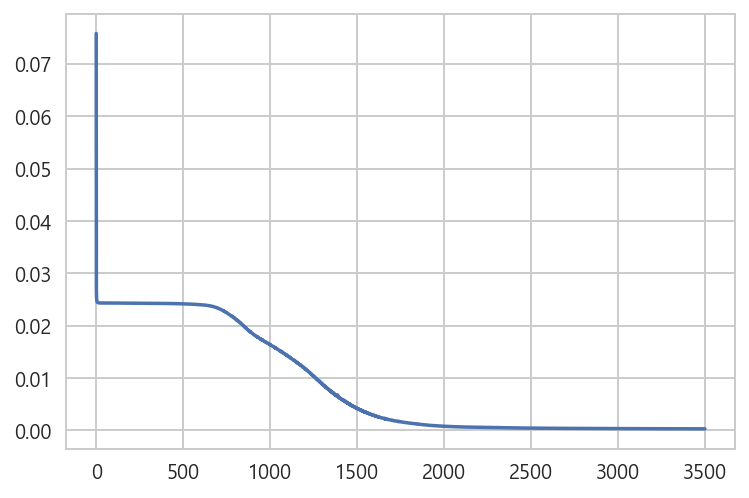

In [564]:
plt.plot(hist.history['loss'])
plt.show()

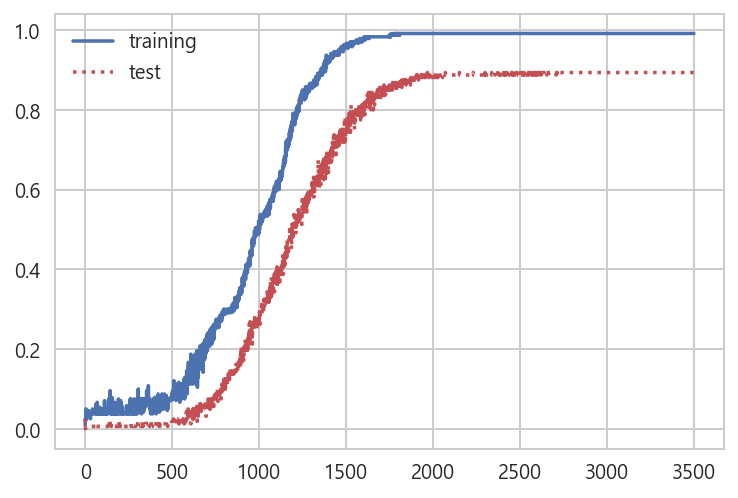

In [565]:
#자료가 좋으면 테스트가 더 높게 나올수도 있다.
plt.plot(hist.history['acc'], 'b-', label="training")
plt.plot(hist.history['val_acc'], 'r:', label="test")
plt.legend()
plt.show()

# CNN - convolutional neural network
- https://datascienceschool.net/view-notebook/e2d30432911f4498b873232dd7d99cce/

>- 이미지 분류를 위한 특별한 구조의 Deep Neural Network
    - local receptive fields
    - shared weights
    - pooling
    
- 데이터가 많아야 훈련이 잘된다

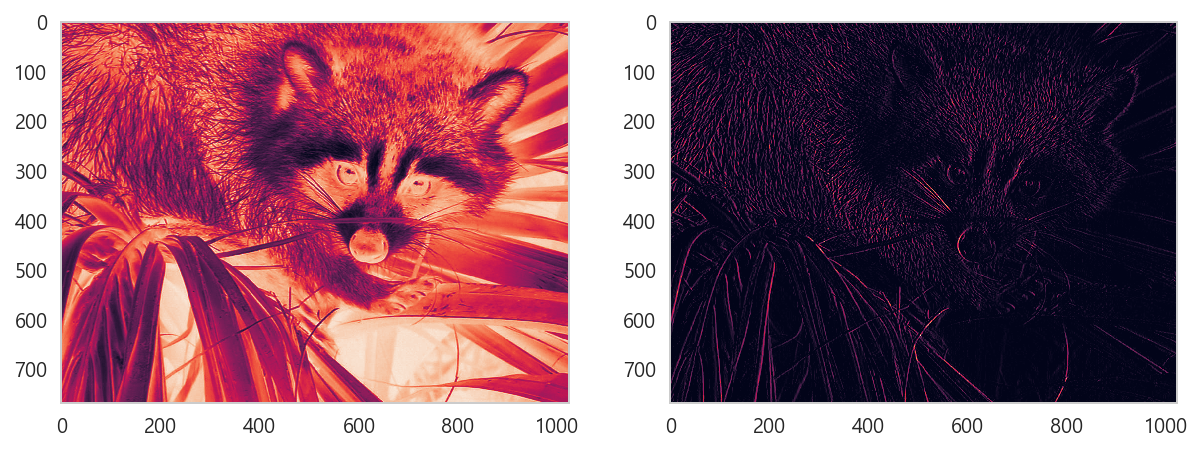

In [571]:
import scipy.ndimage
img = 255 - sp.misc.face(gray=True).astype(float)
k = np.zeros((2,2))
k[:,0] = 1; k[:,1] = -1
img2 = np.maximum(0, sp.ndimage.filters.convolve(img, k))
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(img)
plt.grid(False)
plt.subplot(122)
plt.imshow(img2)
plt.grid(False)

In [572]:
from keras.datasets import mnist
from keras.utils import np_utils

(X_train0, y_train0), (X_test0, y_test0) = mnist.load_data()
X_train = X_train0[:, :, :, np.newaxis].astype('float32') / 255.0
X_test = X_test0[:, :, :, np.newaxis].astype('float32') / 255.0
Y_train = np_utils.to_categorical(y_train0, 10)
Y_test = np_utils.to_categorical(y_test0, 10)


In [573]:
X_train.shape

(60000, 28, 28, 1)

In [574]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adadelta
from keras.regularizers import l2


model1 = Sequential()
model1.add(Conv2D(4, (5, 5), activation='relu', input_shape=(28, 28, 1), kernel_initializer="glorot_uniform"))
model1.add(MaxPooling2D())
model1.add(Flatten())
model1.add(Dense(10, activation='softmax', kernel_initializer="glorot_uniform"))

np.random.seed(0)
model1.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=Adadelta())

In [575]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 4)         104       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 4)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_117 (Dense)            (None, 10)                5770      
Total params: 5,874
Trainable params: 5,874
Non-trainable params: 0
_________________________________________________________________


In [577]:
%%time
hist1 = model1.fit(X_train, Y_train, epochs=10, batch_size=600, validation_data=(X_test, Y_test), verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 36s - loss: 0.8448 - acc: 0.7404 - val_loss: 0.3898 - val_acc: 0.8884
Epoch 2/10
 - 18s - loss: 0.3528 - acc: 0.8962 - val_loss: 0.3312 - val_acc: 0.8984
Epoch 3/10
 - 18s - loss: 0.2898 - acc: 0.9165 - val_loss: 0.2518 - val_acc: 0.9286
Epoch 4/10
 - 17s - loss: 0.2477 - acc: 0.9301 - val_loss: 0.2123 - val_acc: 0.9400
Epoch 5/10
 - 18s - loss: 0.2138 - acc: 0.9396 - val_loss: 0.1887 - val_acc: 0.9463
Epoch 6/10
 - 18s - loss: 0.1880 - acc: 0.9466 - val_loss: 0.1684 - val_acc: 0.9511
Epoch 7/10
 - 18s - loss: 0.1669 - acc: 0.9523 - val_loss: 0.1500 - val_acc: 0.9571
Epoch 8/10
 - 18s - loss: 0.1512 - acc: 0.9567 - val_loss: 0.1342 - val_acc: 0.9611
Epoch 9/10
 - 17s - loss: 0.1387 - acc: 0.9602 - val_loss: 0.1275 - val_acc: 0.9623
Epoch 10/10
 - 18s - loss: 0.1285 - acc: 0.9633 - val_loss: 0.1180 - val_acc: 0.9657
Wall time: 3min 20s


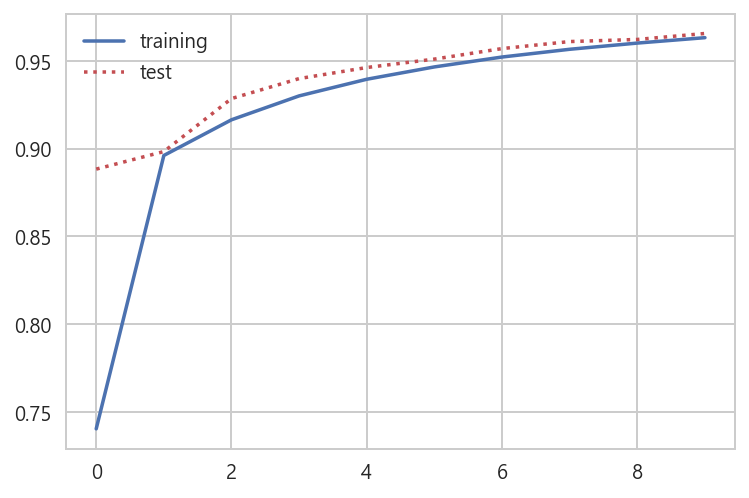

In [578]:
plt.plot(hist1.history['acc'], 'b-', label="training")
plt.plot(hist1.history['val_acc'], 'r:', label="test")
plt.legend()
plt.show()

In [579]:
model1.save("mnist_cnn11.hdf5")

In [580]:
l1 = model1.layers[0]
w1, b1 = l1.get_weights()

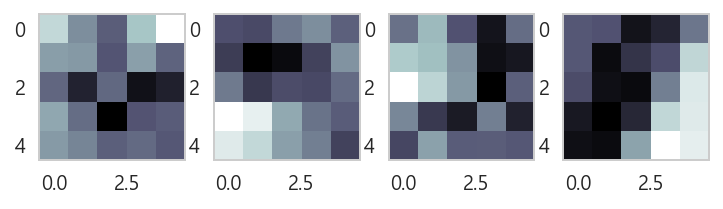

In [581]:
M = 4
for i in range(M):
    plt.subplot(1, M, i + 1)
    plt.imshow(w1[:, :, 0, i], cmap=mpl.cm.bone_r)
    plt.grid(False)

In [582]:
def visualize1(x_test):
    model1_test1 = Sequential()
    model1_test1.add(Conv2D(4, (5, 5), activation='linear', input_shape=(28, 28, 1), weights=(w1, b1)))
    model1_test2 = Sequential()
    model1_test2.add(Conv2D(4, (5, 5), activation='relu', input_shape=(28, 28, 1), weights=(w1, b1)))
    model1_test2.add(MaxPooling2D())
    a_test = model1_test1.predict(x_test)
    z_test = model1_test2.predict(x_test)
    
    plt.figure(figsize=(10, 6))
    M = 4
    for i in range(M + 1):
        if i == 0:
            plt.subplot(3, M + 1, i + 1)
            plt.imshow(x_test[0, :, :, i], cmap=mpl.cm.bone_r)
            plt.xticks([]); plt.yticks([]); plt.grid(False)
        else:
            plt.subplot(3, M + 1, i + 1)
            plt.imshow(w1[:, :, 0, i - 1], cmap=mpl.cm.bone_r)
            plt.xticks([]); plt.yticks([]); plt.grid(False)
            plt.subplot(3, M + 1, i + 1 + M + 1)
            plt.imshow(a_test[0, :, :, i - 1], cmap=mpl.cm.bone_r)
            plt.xticks([]); plt.yticks([]); plt.grid(False)
            plt.subplot(3, M + 1, i + 1 + 2 * M + 2)
            plt.imshow(z_test[0, :, :, i - 1], cmap=mpl.cm.bone_r)
            plt.xticks([]); plt.yticks([]); plt.grid(False)
    plt.tight_layout()
    plt.show()

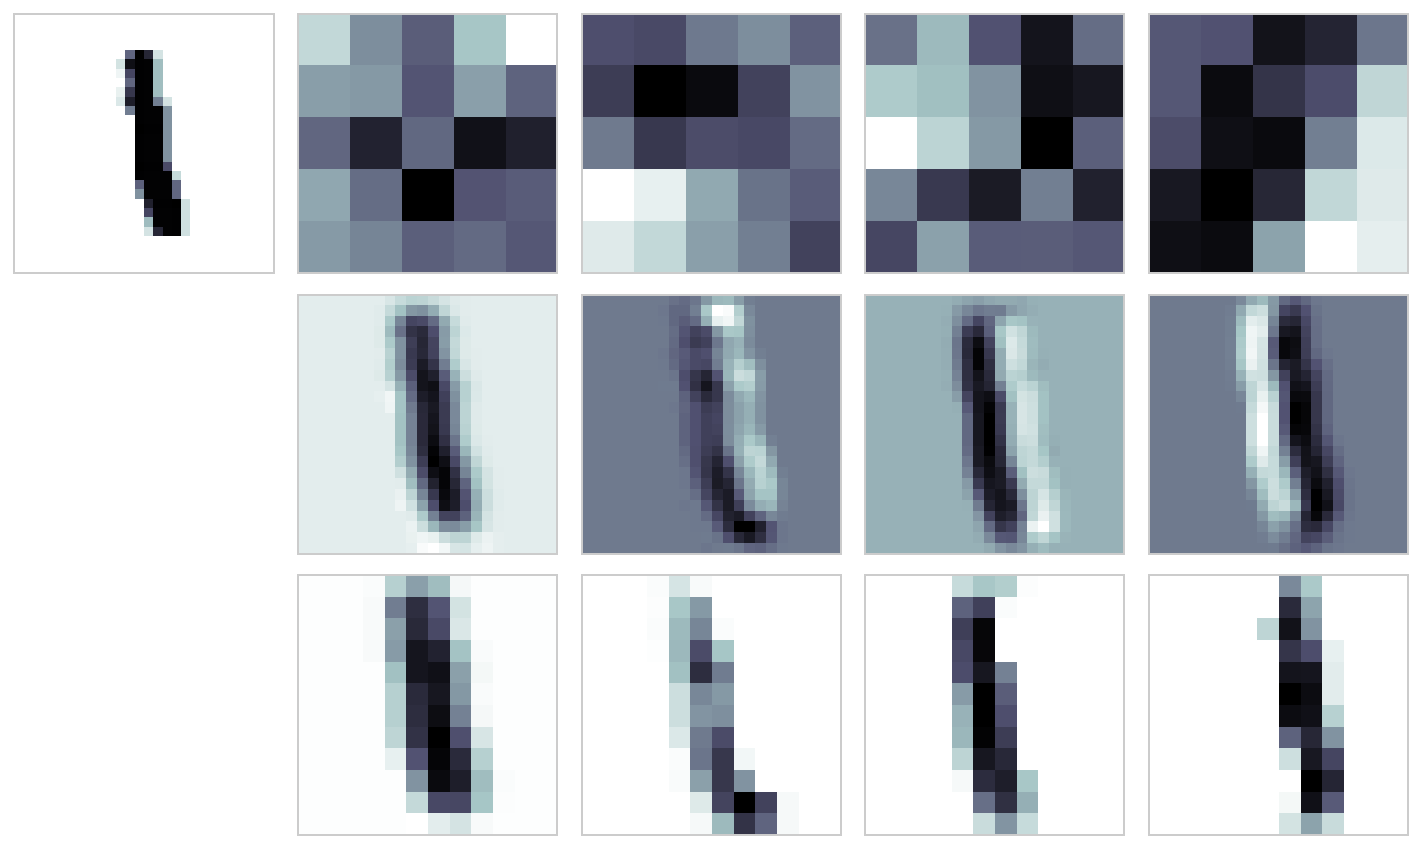

In [583]:
i = 6
visualize1(X_train[i:i + 1])

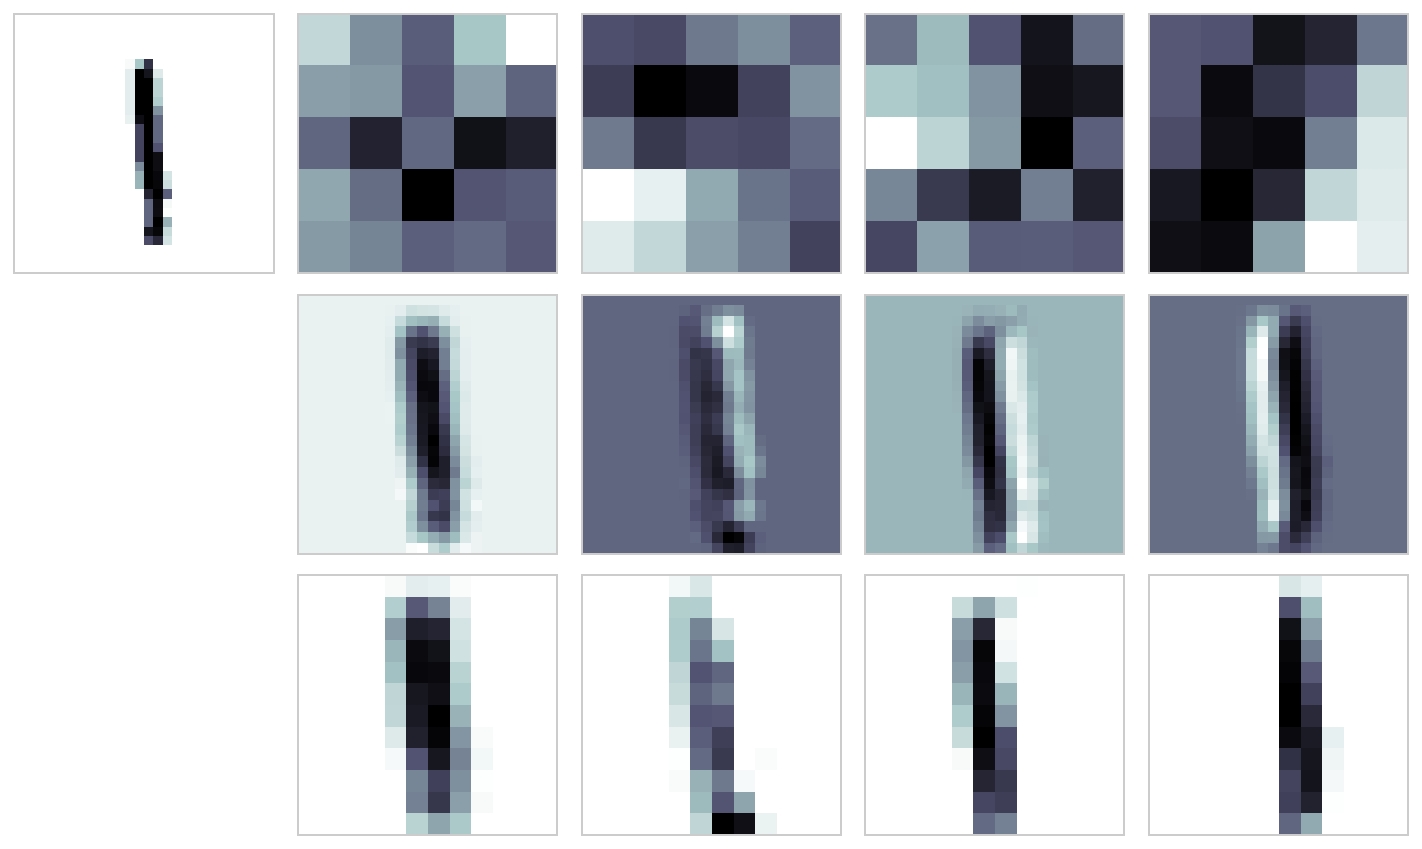

In [584]:
i = 8
visualize1(X_train[i:i + 1])

In [585]:
np.random.seed(0)

model2 = Sequential()

model2.add(Conv2D(4, (5, 5), activation='relu', input_shape=(28, 28, 1), kernel_initializer="glorot_uniform"))
model2.add(MaxPooling2D())
model2.add(Conv2D(4, (5, 5), activation='relu', kernel_initializer="glorot_uniform"))
model2.add(MaxPooling2D())
model2.add(Flatten())
model2.add(Dense(10, activation='softmax', kernel_initializer="glorot_uniform"))

In [586]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 24, 24, 4)         104       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 4)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 4)           404       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 4)           0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_118 (Dense)            (None, 10)                650       
Total params: 1,158
Trainable params: 1,158
Non-trainable params: 0
_________________________________________________________________


In [587]:
model2.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=Adadelta())

In [588]:
%%time
hist2 = model2.fit(X_train, Y_train, epochs=20, batch_size=600, validation_data=(X_test, Y_test), verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 25s - loss: 1.0249 - acc: 0.6603 - val_loss: 0.4352 - val_acc: 0.8599
Epoch 2/20
 - 22s - loss: 0.3465 - acc: 0.8943 - val_loss: 0.2703 - val_acc: 0.9193
Epoch 3/20
 - 26s - loss: 0.2665 - acc: 0.9192 - val_loss: 0.2226 - val_acc: 0.9323
Epoch 4/20
 - 23s - loss: 0.2282 - acc: 0.9312 - val_loss: 0.1973 - val_acc: 0.9402
Epoch 5/20
 - 22s - loss: 0.2017 - acc: 0.9393 - val_loss: 0.1784 - val_acc: 0.9469
Epoch 6/20
 - 23s - loss: 0.1841 - acc: 0.9449 - val_loss: 0.1574 - val_acc: 0.9535
Epoch 7/20
 - 21s - loss: 0.1694 - acc: 0.9491 - val_loss: 0.1480 - val_acc: 0.9565
Epoch 8/20
 - 21s - loss: 0.1582 - acc: 0.9527 - val_loss: 0.1382 - val_acc: 0.9591
Epoch 9/20
 - 21s - loss: 0.1479 - acc: 0.9560 - val_loss: 0.1286 - val_acc: 0.9624
Epoch 10/20
 - 21s - loss: 0.1398 - acc: 0.9581 - val_loss: 0.1252 - val_acc: 0.9626
Epoch 11/20
 - 21s - loss: 0.1337 - acc: 0.9602 - val_loss: 0.1157 - val_acc: 0.9654
Epoch 12/20
 - 22s - los

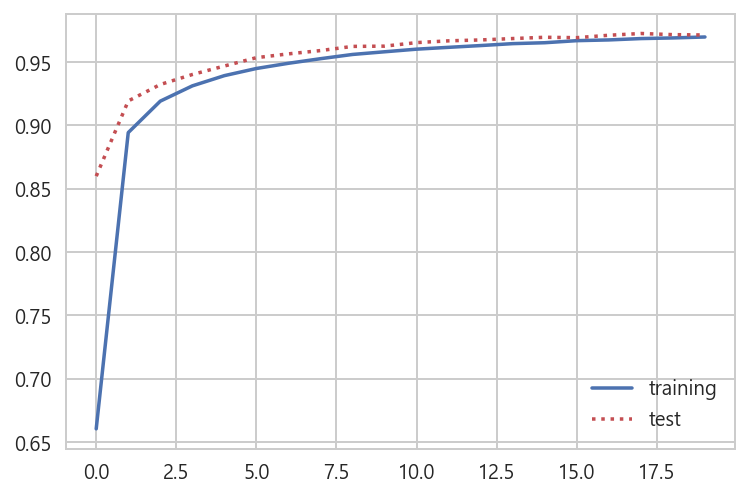

In [589]:
plt.plot(hist2.history['acc'], 'b-', label="training")
plt.plot(hist2.history['val_acc'], 'r:', label="test")
plt.legend()
plt.show()

# 이미지 오그멘테이션

In [590]:
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces()

In [591]:
from sklearn.model_selection import train_test_split
X_train0, X_test0, y_train0, y_test0 = train_test_split(faces.images, faces.target, test_size=0.4, random_state=0)


In [592]:
X_train = X_train0[:, :, :, np.newaxis]
X_test = X_test0[:, :, :, np.newaxis]


In [593]:
from keras.utils import np_utils

Y_train = np_utils.to_categorical(y_train0, 40)
Y_test = np_utils.to_categorical(y_test0, 40)


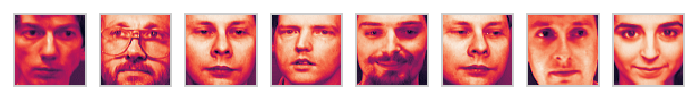

In [594]:
for i in range(8):
    plt.subplot(1, 8, i + 1)
    plt.imshow(X_train[i, :, :, 0])
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])


In [595]:
from keras.preprocessing.image import ImageDataGenerator

In [599]:
train_generator = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True)

In [600]:
train_generator.fit(X_train)

In [601]:
batch_size = 8


In [602]:
iterator = train_generator.flow(X_train[:batch_size], Y_train[:batch_size], batch_size=batch_size)

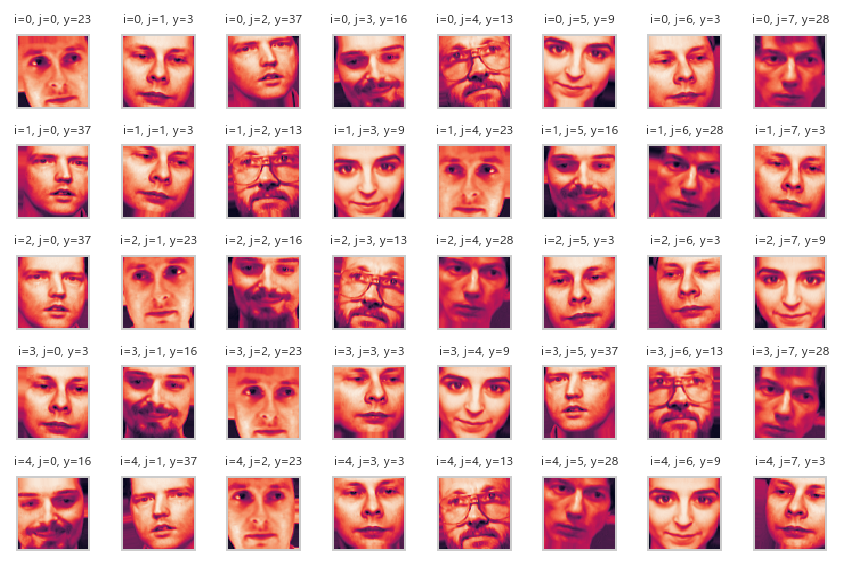

In [603]:
for i in range(int(40 / batch_size)):
    x_augs, y_augs = iterator.next()
    for j in range(batch_size):
        plt.subplot(5, 8, batch_size * i + j + 1)
        plt.imshow(x_augs[j, :, :, 0])
        plt.title("i={}, j={}, y={}".format(i, j, np.argmax(y_augs[j, :])), fontsize=6)
        plt.grid(False)
        plt.xticks([])
        plt.yticks([])
plt.tight_layout()


In [604]:
test_generator = ImageDataGenerator()

In [605]:
train_iterator = train_generator.flow(X_train, Y_train, batch_size=len(X_train))

N = 50
X_train_new = []
Y_train_new = []
for i in range(N):
    x_train_new, y_train_new = train_iterator.next()
    X_train_new.append(x_train_new)
    Y_train_new.append(y_train_new)

In [606]:
X_train_new = np.vstack(X_train_new)
Y_train_new = np.vstack(Y_train_new)

In [607]:
X_train_new.shape

(12000, 64, 64, 1)

In [608]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import *
from keras.regularizers import l2

In [609]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout
from keras.optimizers import *

np.random.seed(0)

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adadelta, SGD
from keras.regularizers import l2

np.random.seed(0)

model = Sequential()

model.add(Conv2D(20, (4, 4), activation='relu', input_shape=(64, 64, 1), padding="same", kernel_initializer="glorot_uniform"))
model.add(MaxPooling2D())
model.add(Dropout(0.4))
model.add(Conv2D(50, (4, 4), activation='relu', padding="same", kernel_initializer="glorot_uniform"))
model.add(MaxPooling2D())
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(100, activation='tanh', kernel_initializer="glorot_uniform"))
model.add(Dense(40, activation='softmax', kernel_initializer="glorot_uniform"))
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=RMSprop())

In [610]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 64, 64, 20)        340       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 32, 32, 20)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 20)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 50)        16050     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 50)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 50)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 12800)             0         
__________

In [611]:
%%time
hist1 = model.fit(X_train, Y_train, epochs=20, batch_size=20, validation_data=(X_test, Y_test), verbose=2)

Train on 240 samples, validate on 160 samples
Epoch 1/20
 - 5s - loss: 3.9073 - acc: 0.0250 - val_loss: 3.6902 - val_acc: 0.0188
Epoch 2/20
 - 3s - loss: 3.6760 - acc: 0.0625 - val_loss: 3.6819 - val_acc: 0.0188
Epoch 3/20
 - 3s - loss: 3.6032 - acc: 0.0875 - val_loss: 3.6283 - val_acc: 0.1375
Epoch 4/20
 - 3s - loss: 3.3249 - acc: 0.1917 - val_loss: 3.2410 - val_acc: 0.1750
Epoch 5/20
 - 3s - loss: 2.8450 - acc: 0.2708 - val_loss: 2.8488 - val_acc: 0.4187
Epoch 6/20
 - 3s - loss: 2.0682 - acc: 0.5667 - val_loss: 2.1904 - val_acc: 0.4625
Epoch 7/20
 - 3s - loss: 1.5114 - acc: 0.7000 - val_loss: 1.8293 - val_acc: 0.5688
Epoch 8/20
 - 4s - loss: 1.1176 - acc: 0.7792 - val_loss: 1.4069 - val_acc: 0.7500
Epoch 9/20
 - 3s - loss: 0.7674 - acc: 0.8875 - val_loss: 1.1159 - val_acc: 0.7563
Epoch 10/20
 - 3s - loss: 0.5725 - acc: 0.9542 - val_loss: 0.9408 - val_acc: 0.8000
Epoch 11/20
 - 3s - loss: 0.3982 - acc: 0.9542 - val_loss: 0.8492 - val_acc: 0.8563
Epoch 12/20
 - 3s - loss: 0.2380 - acc:

In [612]:
%%time
hist2 = model.fit(X_train_new, Y_train_new, epochs=20, batch_size=20, validation_data=(X_test, Y_test), verbose=2)

Train on 12000 samples, validate on 160 samples
Epoch 1/20
 - 120s - loss: 0.6479 - acc: 0.8425 - val_loss: 0.2160 - val_acc: 0.9500
Epoch 2/20
 - 118s - loss: 0.0970 - acc: 0.9822 - val_loss: 0.1886 - val_acc: 0.9375
Epoch 3/20
 - 128s - loss: 0.0349 - acc: 0.9937 - val_loss: 0.1295 - val_acc: 0.9562
Epoch 4/20


KeyboardInterrupt: 

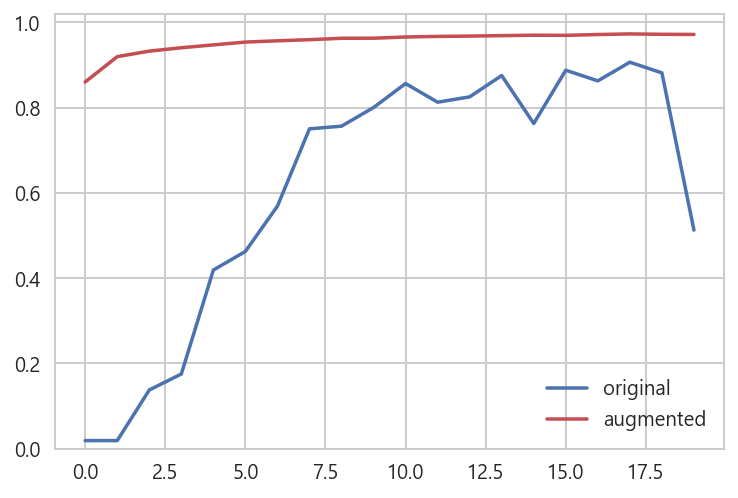

In [613]:
plt.plot(hist1.history['val_acc'], 'b', label="original")
plt.plot(hist2.history['val_acc'], 'r', label="augmented")
plt.ylim(0, 1.02)
plt.legend()
plt.show()


# VGG16

In [614]:
from keras.applications.vgg16 import VGG16, decode_predictions

In [615]:
model = VGG16()

553467904/553467096 [==============================] - 451s 1us/step


In [616]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

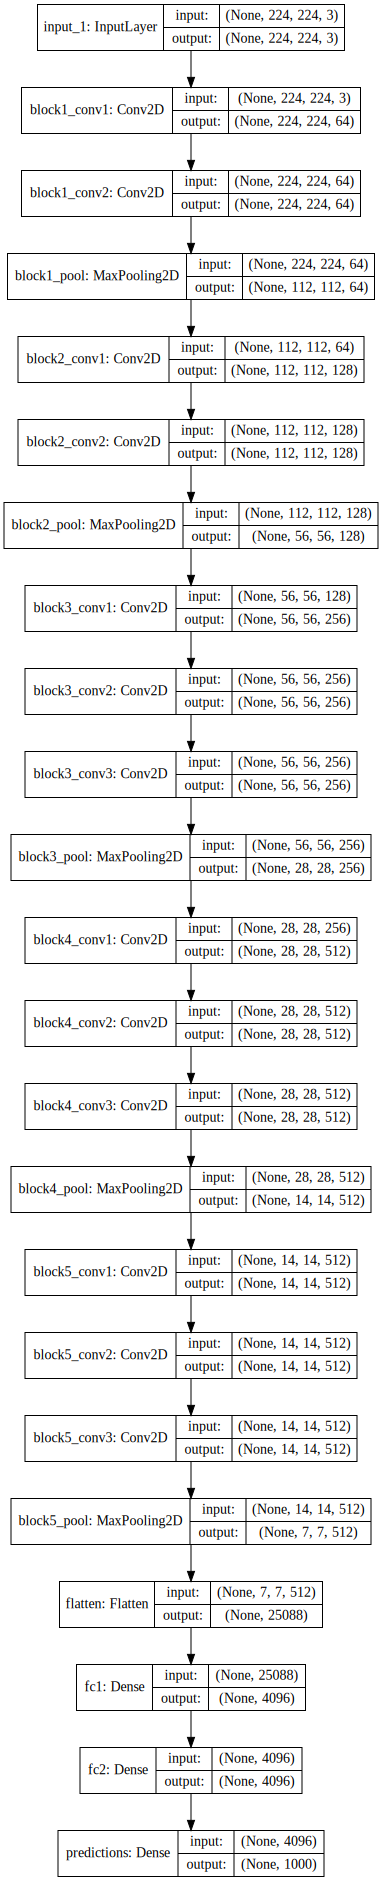

In [617]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [618]:
model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=["accuracy"])

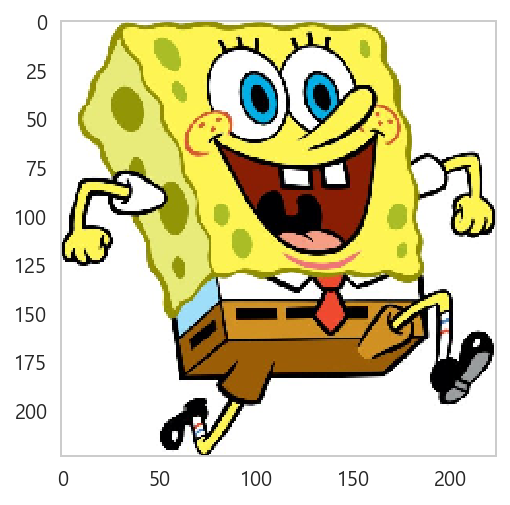

In [619]:
from PIL import Image
 
im = np.array(Image.open('sponge-bob.jpg').resize((224, 224)))
plt.imshow(im)
plt.grid(False)

In [622]:
x = im[np.newaxis, :, :, :]
yhat = model.predict(x)
label = decode_predictions(yhat)
label = label[0][0]
print('%s (%.2f%%)' % (label[1], label[2]*100))

envelope (21.62%)


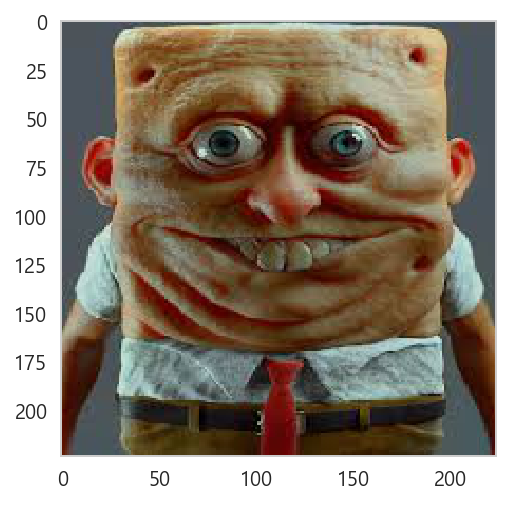

In [623]:
im = np.array(Image.open('real_bob.jpg').resize((224, 224)))
plt.imshow(im)
plt.grid(False)

In [624]:
x = im[np.newaxis, :, :, :]
yhat = model.predict(x)
label = decode_predictions(yhat)
label = label[0][0]
print('%s (%.2f%%)' % (label[1], label[2]*100))

diaper (33.19%)


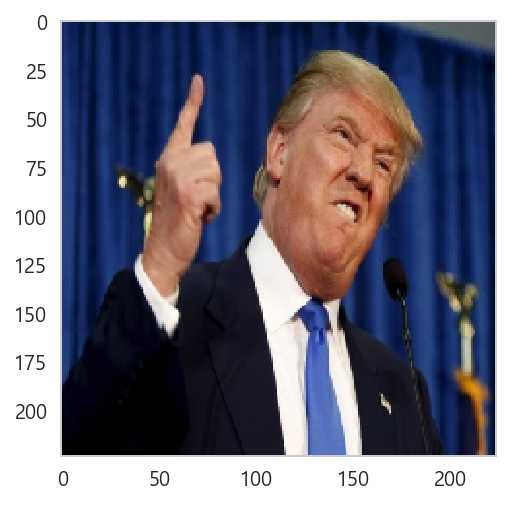

In [625]:
im = np.array(Image.open('trump.jpg').resize((224, 224)))
plt.imshow(im)
plt.grid(False)

In [626]:
x = im[np.newaxis, :, :, :]
yhat = model.predict(x)
label = decode_predictions(yhat)
label = label[0][0]
print('%s (%.2f%%)' % (label[1], label[2]*100))

lab_coat (10.96%)


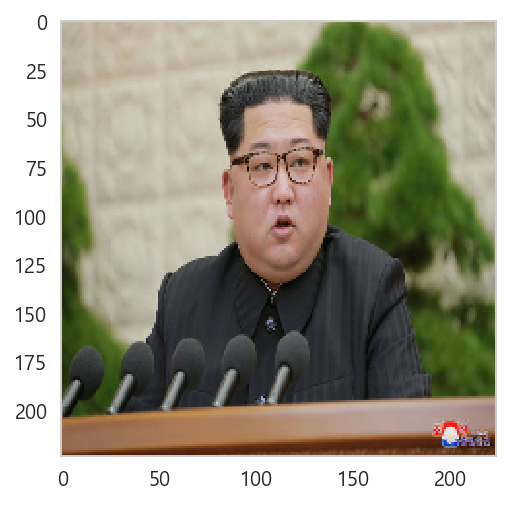

In [642]:
im = np.array(Image.open('pig.jpg').resize((224, 224)))
plt.imshow(im)
plt.grid(False)

In [643]:
x = im[np.newaxis, :, :, :]
yhat = model.predict(x)
label = decode_predictions(yhat)
label = label[0][0]
print('%s (%.2f%%)' % (label[1], label[2]*100))

marimba (13.74%)


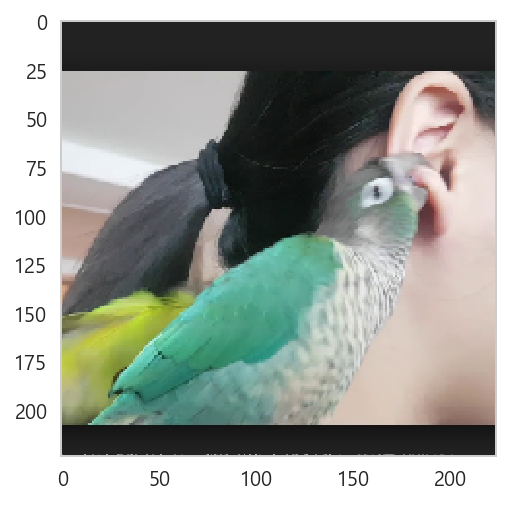

In [646]:
im = np.array(Image.open('bird_bite.jpg').resize((224, 224)))
plt.imshow(im)
plt.grid(False)

In [647]:
x = im[np.newaxis, :, :, :]
yhat = model.predict(x)
label = decode_predictions(yhat)
label = label[0][0]
print('%s (%.2f%%)' % (label[1], label[2]*100))

sulphur-crested_cockatoo (91.50%)


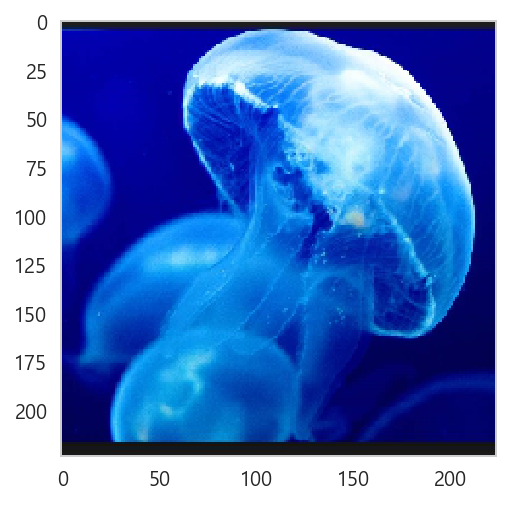

In [650]:
im = np.array(Image.open('jellyfish.jpg').resize((224, 224)))
plt.imshow(im)
plt.grid(False)

In [651]:
x = im[np.newaxis, :, :, :]
yhat = model.predict(x)
label = decode_predictions(yhat)
label = label[0][0]
print('%s (%.2f%%)' % (label[1], label[2]*100))

jellyfish (99.21%)


- 유니그램모형 - 쓸모가없다.
- 바이그램모형
- N-그램 모형
- 확률 추정방법
- 바이그램
